## 1. Explore data

In [1]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy.ma.core import count

folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)

# unique participant_ids count
def unique_participant_ids(dataframe):
    unique_participants = dataframe['PARTICIPANT_ID'].nunique()
    print(f"Count of unique PARTICIPANT_IDs: {unique_participants}")

# print all ids
def print_pids(folder):
    unique_ids = set()

    for file in folder:
        with open(file, 'r', encoding='utf-8') as f:
            reader = csv.reader(f)
            header = next(reader)
            try:
                pid_idx = header.index('PARTICIPANT_ID')
            except ValueError:
                continue  # Skip files without the column
            for row in reader:
                if len(row) > pid_idx:
                    participant_id = row[pid_idx]
                    unique_ids.add(participant_id)

    print("Unique PARTICIPANT_IDs:")
    for pid in unique_ids:
        print(pid)
    print(f"Total unique PARTICIPANT_IDs: {len(unique_ids)}")

#submission per participant id
def submissions_per_pid(dataframe):
    files_per_participant = dataframe.groupby('PARTICIPANT_ID')['SOURCE_FILE'].nunique()
    files_per_participant.plot(kind='bar')
    plt.title('Data per PARTICIPANT_ID')
    plt.xlabel('PARTICIPANT_ID')
    plt.ylabel('Data')
    plt.show()

# usage time
def usage_time(df):
    return df['RELEASE_TIME'].max() - df['PRESS_TIME'].min()

# usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
# print("total time passed PARTICIPANT_ID (ms):")
# print(usage_times)

# frequency
def show_frequency(dataframe):
    plt.figure()
    dataframe['FREQUENCY'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of FREQUENCY')
    plt.xlabel('FREQUENCY')
    plt.ylabel('Count')
    plt.show()

# count columns
def count_rows(folder):
    df_rows_count_current = []
    for file in folder:
        df_current = pd.read_csv(file)
        df_current['ROW_COUNT'] = len(df_current)
        df_rows_count_current.append(df_current)
    df_rows_count = pd.concat(df_rows_count_current, ignore_index=True)
    print(df_rows_count)

    # calculate time passing for each file

def calculate_time_per_file(folder):
    df_calculate_time_current = []
    for file in folder:
        df_current = pd.read_csv(file)
        df_current['TIME_PASSING'] = df_current['RELEASE_TIME'] - df_current['PRESS_TIME']
        df_calculate_time_current.append(df_current)
    df_calculate_time = pd.concat(df_calculate_time_current, ignore_index=True)
    print(df_calculate_time)

# 5. length of rows per file
def prompt_length_per_file(df):
    return df['PROMPT'].astype(str).apply(len).sum()

# prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
# print("Length of PROMPT Columns per file:")
# print(prompt_lengths)

In [2]:
# print(unique_participant_ids(data))
# print(print_pids(all_files))
# print(submissions_per_pid(data))
#
# usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
# print("total time passed PARTICIPANT_ID (ms):")
# print(usage_times)
#
# print(show_frequency(data))
#
# prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
# print("Length of PROMPT Columns per file:")
# print(prompt_lengths)

### Failure given data having invalid characters -> clean data

In [3]:
import os

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def print_invalid_participant_ids(file_paths):
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    print(f"Invalid PARTICIPANT_ID in file {path}: {pid}")
        except Exception as e:
            print(f"Error reading {path}: {e}")

def print_unique_valid_participant_ids(file_paths):
    valid_ids = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            for pid in df.get('PARTICIPANT_ID', []):
                if is_valid_participant_id(pid):
                    valid_ids.add(pid)
        except Exception as e:
            print(f"Error reading {path}: {e}")
    print("Unique valid PARTICIPANT_IDs:")
    for pid in valid_ids:
        print(pid)
    print(f"Total valid PARTICIPANT_IDs: {len(valid_ids)}")

folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

print_invalid_participant_ids(all_files)
print_unique_valid_participant_ids(all_files)

Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091734.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091841.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091947.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827092128.csv: name 're' is not defined
E

In [4]:
import re
import shutil
import os

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def get_files_with_invalid_participant_ids(file_paths):
    invalid_files = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    invalid_files.add(path)
                    break
        except Exception as e:
            print(f"Error reading {path}: {e}")
    return invalid_files

# Example usage:
invalid_files = get_files_with_invalid_participant_ids(all_files)
os.makedirs('data/valid_keystrokes', exist_ok=True)
for file in all_files:
    if file not in invalid_files:
        shutil.copy(file, os.path.join('data/valid_keystrokes', os.path.basename(file)))

In [5]:
import csv

folder = 'data/valid_keystrokes'
all_valid_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]


dfs = []
for file in all_valid_files:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data_id_cleaned = pd.concat(dfs, ignore_index=True)

### with cleaned id overview

Count of unique PARTICIPANT_IDs: 104
None
Unique PARTICIPANT_IDs:
6672bf56d51710391ce2164d
5f29eff59714081a3594a331
673f7365f63a4a3036aae1f2
67430c9cce2366e644146584
66568a94f8713133e461fe9c
664e413a5f3eb7f99d90e15b
664b33c7c40530f620a719a0
6702f60844f21087e0840e3d
6081728972120aa7f9685791
65fbb4220141f00a2ed68e4b
57507e67fcaa630007cb9ad2
664fa86722f5339adebd32ec
65fda4aa45ba55e983e2a2d9
5accb373436f5500010037ee
65689a7642fbd31df35497eb
67356f7cf6ff16fe3322a837
6614435124bf16e7a24f9662
6672fea3fe6378e257b6ef25
615921b85071b9caef6148d8
5fa76304caa4374da116923a
6679a3b7cb020a6e4728eac5
663b8164ac148ec74b884ed5
666f76b68b89442817be678a
6725030a6ee43d8130ceefc5
676797a573d3cbf6add72f02
66321cfc446914f3b199e193
5d3b0da8a884020001881773
6635344fb4ae723326e3ce04
5de42a01a7cb2401ccc682c3
65c7b42c1c15b1064e26f265
6538097b8793d9b90adc4667
65feaaac53eb219f09ad5ea0
66bb6b7e0ccbed81f3ed30a8
5f600669b846780f0fe45709
65fb34c4df61f03ce0dd6dd9
606598de386cd206c99a4648
60bf706fc3b12a3c4f11a487
6725c4a8e

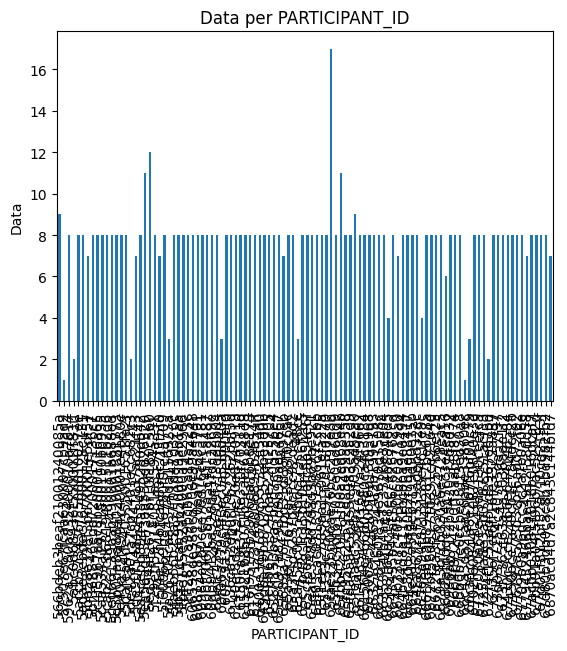

None
total time passed PARTICIPANT_ID (ms):
PARTICIPANT_ID
566bdeb3beaf21001240085a    11436794
57507e67fcaa630007cb9ad2      124106
5962a9280b835400010a7617     1000373
5abc0d68436f550001ff83ff       77148
5accb373436f5500010037ee     1848518
                              ...   
67acbb030811018b016dcaf7      406600
67bb91a04f5f96b7ac52242d     1772835
67d01f812bf82a710cd2193f     1480021
67d80b3db0cac8b1bd982fb2      404790
6870acd4d7a2c843c144bfd7     7504700
Length: 104, dtype: int64


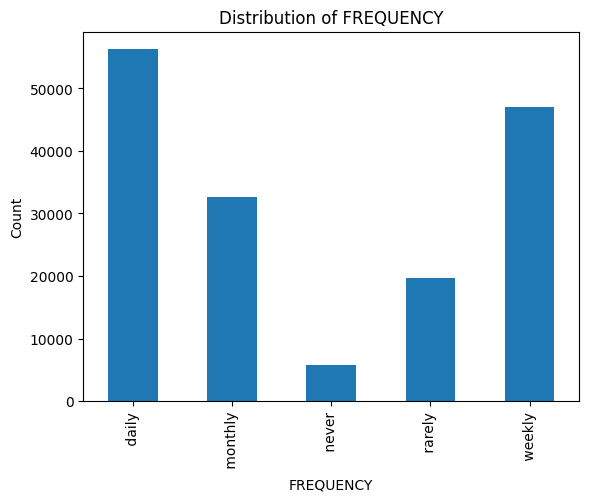

None
Length of PROMPT Columns per file:
SOURCE_FILE
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv     59427
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv    143934
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv     36414
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv     30056
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv     53289
                                                                                 ...  
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074523.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074524.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074750.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074751.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074752.csv  

In [6]:
print(unique_participant_ids(data_id_cleaned))
print(print_pids(all_valid_files))
print(submissions_per_pid(data_id_cleaned))

usage_times = data_id_cleaned.groupby('PARTICIPANT_ID').apply(usage_time, include_groups=False)
print("total time passed PARTICIPANT_ID (ms):")
print(usage_times)

print(show_frequency(data_id_cleaned))

prompt_lengths = data_id_cleaned.groupby('SOURCE_FILE').apply(prompt_length_per_file, include_groups=False)
print("Length of PROMPT Columns per file:")
print(prompt_lengths)

print(count_rows(all_valid_files))

print(calculate_time_per_file(all_valid_files))

## Folder contains participant ids with more than 8 submissions

In [7]:
import os
import shutil
from collections import Counter
from pathlib import Path
import pandas as pd

def clean_full_submission(folder: str | os.PathLike) -> dict:
    """
    Scan `folder` for CSVs, count how many files each PARTICIPANT_ID appears in
    (counting once per file), and create 'data/full_submissions' containing only
    files whose PARTICIPANT_ID appears in exactly 8 files.

    Returns:
        {
            "counts": Counter({participant_id: num_files, ...}),
            "ids_exactly_8": set([...]),
            "ids_less_than_8": set([...]),
            "ids_more_than_8": set([...]),
            "file_to_id": {Path(...): "participant_id", ...},
            "output_dir": Path("data/full_submissions"),
            "problems": [(Path(...), "message"), ...],
        }
    """
    folder = Path(folder)
    csv_files = sorted(p for p in folder.glob("*.csv") if p.is_file())
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in: {folder}")

    file_to_id: dict[Path, str] = {}
    problems: list[tuple[Path, str]] = []

    for f in csv_files:
        try:
            df = pd.read_csv(f, low_memory=False)
            if "PARTICIPANT_ID" not in df.columns:
                problems.append((f, "Missing column 'PARTICIPANT_ID'"))
                continue

            s = df["PARTICIPANT_ID"].astype(str).str.strip()
            vals = [v for v in s if v and v.lower() != "nan"]
            if not vals:
                problems.append((f, "No participant ID values"))
                continue

            # Expect a single ID per file; if not, use the mode
            unique_ids = set(vals)
            if len(unique_ids) == 1:
                pid = next(iter(unique_ids))
            else:
                pid = pd.Series(vals).value_counts().idxmax()
                problems.append((f, f"Multiple IDs found, using most frequent: {pid}"))

            file_to_id[f] = str(pid)

        except Exception as e:
            problems.append((f, f"Error reading file: {e!s}"))

    # Count files per participant (each file contributes at most once)
    counts = Counter(file_to_id.values())
    ids_exactly_8 = {pid for pid, c in counts.items() if c == 8}
    ids_less_than_8 = {pid for pid, c in counts.items() if c < 8}
    ids_more_than_8 = {pid for pid, c in counts.items() if c > 8}

    # Create output dir exactly like your working snippet (relative, no leading slash)
    output_dir = Path("data") / "full_submissions"
    os.makedirs(output_dir, exist_ok=True)

    # Optional: clear existing files so the folder reflects the current rule
    for p in output_dir.iterdir():
        if p.is_file():
            p.unlink()

    # Copy only files whose participant has exactly 8 files in total
    selected_files = [f for f, pid in file_to_id.items() if pid in ids_exactly_8]
    for f in selected_files:
        shutil.copy(f, output_dir / f.name)

    # Quick console summary
    print(f"Scanned {len(csv_files)} files in: {folder}")
    print(f">8 files: {sorted(ids_more_than_8)}")
    print(f"<8 files: {sorted(ids_less_than_8)}")
    print(f"=8 files: {sorted(ids_exactly_8)}")
    print(f"Copied {len(selected_files)} files to: {output_dir.resolve()}")

    return {
        "counts": counts,
        "ids_exactly_8": ids_exactly_8,
        "ids_less_than_8": ids_less_than_8,
        "ids_more_than_8": ids_more_than_8,
        "file_to_id": file_to_id,
        "output_dir": output_dir,
        "problems": problems,
    }


In [8]:
result = clean_full_submission('data/valid_keystrokes')

Scanned 784 files in: data\valid_keystrokes
>8 files: ['566bdeb3beaf21001240085a', '5ea56ad134f3aa550dd26320', '5ed94af267e7bf10f180c5b0', '65fae23bd06ae76bcc297e8b', '65fbb4220141f00a2ed68e4b', '65feaaac53eb219f09ad5ea0']
<8 files: ['57507e67fcaa630007cb9ad2', '5abc0d68436f550001ff83ff', '5bb58e338f3bd70001e5df57', '5de42a01a7cb2401ccc682c3', '5de90f54a48441037ac21f43', '5f4e12f4bfcaa83ec7f3f5f0', '5fa76304caa4374da116923a', '60f06a479c4f3ec0a536d40a', '65689a7642fbd31df35497eb', '65a45ac08354b6cf79cc48cc', '663b8164ac148ec74b884ed5', '664b33c7c40530f620a719a0', '66568a94f8713133e461fe9c', '6682afdddc274c7cc3e4ea16', '66c4a3da2faac6abe33860ec', '66ca1c321a8e2b7f6bf01c79', '672f4f1751ad53d8967e67bd', '6779432466bae4912f58dd58', '6870acd4d7a2c843c144bfd7']
=8 files: ['5962a9280b835400010a7617', '5accb373436f5500010037ee', '5adae3ebdec767000128c131', '5bf368846edd7200017136c7', '5c4f5967aac8be0001716a65', '5caa534a19731a00190bb935', '5cab22cd68194f001511b2d6', '5ced66139b5b490001b688ed',

### verify grafically 8 submissions cleaned

In [9]:
folder = 'data/full_submissions'
all_full_submission = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]


dfs = []
for file in all_full_submission:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data_id_full = pd.concat(dfs, ignore_index=True)

Count of unique PARTICIPANT_IDs: 79
None
Unique PARTICIPANT_IDs:
6672bf56d51710391ce2164d
5f29eff59714081a3594a331
673f7365f63a4a3036aae1f2
67430c9cce2366e644146584
664e413a5f3eb7f99d90e15b
6702f60844f21087e0840e3d
6081728972120aa7f9685791
664fa86722f5339adebd32ec
65fda4aa45ba55e983e2a2d9
5accb373436f5500010037ee
67356f7cf6ff16fe3322a837
6614435124bf16e7a24f9662
6672fea3fe6378e257b6ef25
615921b85071b9caef6148d8
6679a3b7cb020a6e4728eac5
6725030a6ee43d8130ceefc5
666f76b68b89442817be678a
676797a573d3cbf6add72f02
66321cfc446914f3b199e193
5d3b0da8a884020001881773
6635344fb4ae723326e3ce04
65c7b42c1c15b1064e26f265
6538097b8793d9b90adc4667
66bb6b7e0ccbed81f3ed30a8
5f600669b846780f0fe45709
65fb34c4df61f03ce0dd6dd9
606598de386cd206c99a4648
60bf706fc3b12a3c4f11a487
6725c4a8e3ab0787551acf38
65f03cac071873738667ccbb
664b44d8a11f1bcbba9e0494
60db9412ba928de1fdc2269e
65fc95c627592d85499ae358
60984a1b0cce76d16c4ca781
6643495b44af166c626762cd
5962a9280b835400010a7617
6136cb52db0f1cb2262bbf5d
5fff2877a9

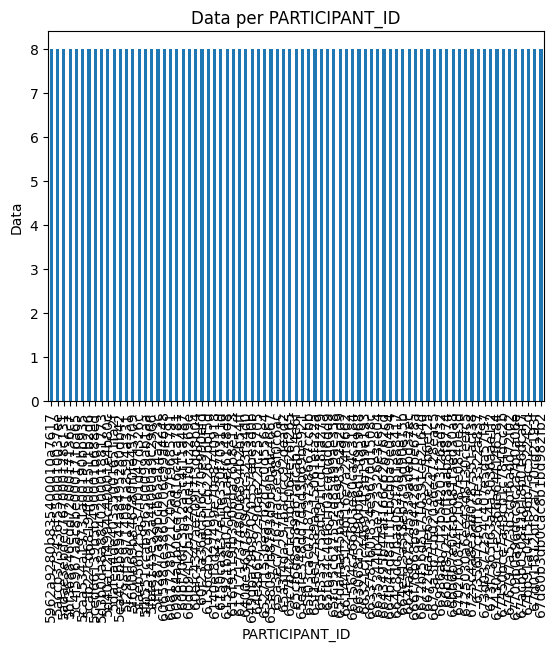

None
total time passed PARTICIPANT_ID (ms):
PARTICIPANT_ID
566bdeb3beaf21001240085a    11436794
57507e67fcaa630007cb9ad2      124106
5962a9280b835400010a7617     1000373
5abc0d68436f550001ff83ff       77148
5accb373436f5500010037ee     1848518
                              ...   
67acbb030811018b016dcaf7      406600
67bb91a04f5f96b7ac52242d     1772835
67d01f812bf82a710cd2193f     1480021
67d80b3db0cac8b1bd982fb2      404790
6870acd4d7a2c843c144bfd7     7504700
Length: 104, dtype: int64


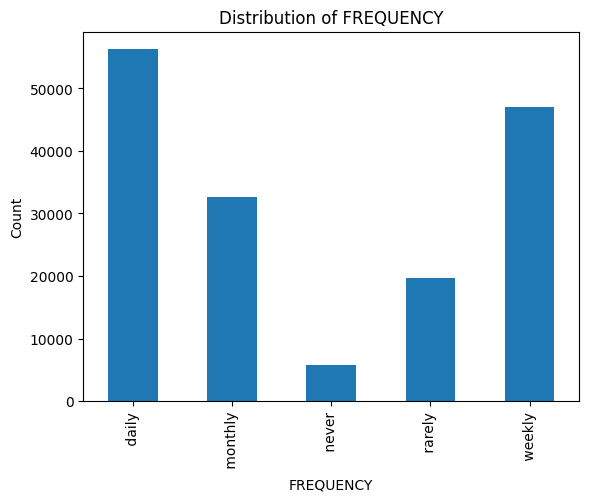

None
Length of PROMPT Columns per file:
SOURCE_FILE
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv     59427
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv    143934
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv     36414
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv     30056
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv     53289
                                                                                 ...  
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074523.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074524.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074750.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074751.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074752.csv  

In [10]:
print(unique_participant_ids(data_id_full))
print(print_pids(all_full_submission))
print(submissions_per_pid(data_id_full))

usage_times = data_id_cleaned.groupby('PARTICIPANT_ID').apply(usage_time, include_groups=False)
print("total time passed PARTICIPANT_ID (ms):")
print(usage_times)

print(show_frequency(data_id_cleaned))

prompt_lengths = data_id_cleaned.groupby('SOURCE_FILE').apply(prompt_length_per_file, include_groups=False)
print("Length of PROMPT Columns per file:")
print(prompt_lengths)

print(count_rows(all_full_submission))

print(calculate_time_per_file(all_full_submission))

In [11]:
from pathlib import Path
import pandas as pd

def _is_ascii_printable(ch: str) -> bool:
    o = ord(ch)
    return 0x20 <= o <= 0x7E  # space .. ~

def _is_cjk_like(ch: str) -> bool:
    o = ord(ch)
    # Unified ideographs + extensions
    return (
        (0x4E00 <= o <= 0x9FFF) or        # CJK Unified Ideographs
        (0x3400 <= o <= 0x4DBF) or        # CJK Extension A
        (0x20000 <= o <= 0x2A6DF) or      # CJK Extension B
        (0x2A700 <= o <= 0x2B73F) or      # CJK Extension C
        (0x2B740 <= o <= 0x2B81F) or      # CJK Extension D
        (0x2B820 <= o <= 0x2CEAF) or      # CJK Extension E
        (0x2CEB0 <= o <= 0x2EBEF) or      # CJK Extension F/G
        (0xF900 <= o <= 0xFAFF) or        # CJK Compatibility Ideographs
        (0x3040 <= o <= 0x309F) or        # Hiragana
        (0x30A0 <= o <= 0x30FF) or        # Katakana
        (0xFF65 <= o <= 0xFF9F) or        # Halfwidth Katakana
        (0xAC00 <= o <= 0xD7AF) or        # Hangul Syllables
        (0x1100 <= o <= 0x11FF)           # Hangul Jamo
    )

def _tally_token(token: str, process_markers=("process", "dead", "ime")):
    """
    Count characters within a single token/keystroke label.
    Returns (ascii_printable, cjk_like, other, process_flag)
    """
    if token is None:
        return 0, 0, 0, 0

    t = str(token).strip()
    # If the logger writes special events as words like 'Process', 'Dead', etc.
    if t.lower() in process_markers:
        return 0, 0, 0, 1

    ascii_cnt = sum(_is_ascii_printable(ch) for ch in t)
    cjk_cnt   = sum(_is_cjk_like(ch)       for ch in t)
    other_cnt = max(len(t) - ascii_cnt - cjk_cnt, 0)
    return ascii_cnt, cjk_cnt, other_cnt, 0

def detect_majority_regular_keys(
    folder,
    key_col="KEY",                 # change to your keystroke column name if different
    participant_id_col="PARTICIPANT_ID",
    file_pattern="*.csv",
    process_markers=("process", "dead", "ime"),
    per_file_mode=True,            # if True, only the mode key label per file counts once (less bias)
):
    """
    Scans all CSVs in `folder` and estimates, per participant and overall, whether
    keystrokes are mostly regular ASCII vs. CJK/IME composition ('Process/Dead/IME').

    Returns:
      {
        "overall": { "ascii_ratio": float, "cjk_ratio": float, "process_ratio": float, "classification": str },
        "participants": {
            "<participant_id>": {
                "ascii_ratio": float,
                "cjk_ratio": float,
                "process_ratio": float,
                "n_tokens": int,
                "classification": "regular" | "cjk_like" | "ime_process_heavy"
            },
            ...
        }
      }
    """
    folder = Path(folder)
    files = sorted(p for p in folder.glob(file_pattern) if p.is_file())
    if not files:
        raise FileNotFoundError(f"No files matching {file_pattern} in {folder}")

    # Per-participant tallies
    per_pid = {}

    # Helper to update tallies
    def _accumulate(pid, token):
        a, c, o, p = _tally_token(token, process_markers)
        rec = per_pid.setdefault(pid, {"ascii":0, "cjk":0, "other":0, "process":0, "n":0})
        rec["ascii"] += a
        rec["cjk"]   += c
        rec["other"] += o
        rec["process"] += p
        rec["n"]     += max(len(str(token)) if token is not None else 0, p)  # count chars or 1 for process

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"Error reading {f.name}: {e}")
            continue

        if participant_id_col not in df.columns:
            print(f"Skipping {f.name}: missing '{participant_id_col}'")
            continue
        if key_col not in df.columns:
            print(f"Skipping {f.name}: missing '{key_col}'")
            continue

        # determine the file's participant id (expect single id; fallback to mode)
        pids = df[participant_id_col].dropna().astype(str).str.strip()
        pid = pids.mode().iloc[0] if not pids.empty else "__unknown__"

        keys = df[key_col].dropna().astype(str)

        if per_file_mode:
            # Use the most frequent key label in the file to avoid bias from very long texts
            token = keys.mode().iloc[0] if not keys.empty else None
            _accumulate(pid, token)
        else:
            for token in keys:
                _accumulate(pid, token)

    # Compute ratios and classifications
    def _ratios(rec):
        total_chars = rec["ascii"] + rec["cjk"] + rec["other"]
        total_events = total_chars + rec["process"]  # treat process as its own bucket
        if total_events == 0:
            return 0.0, 0.0, 0.0
        ascii_ratio   = rec["ascii"]   / total_events
        cjk_ratio     = rec["cjk"]     / total_events
        process_ratio = rec["process"] / total_events
        return ascii_ratio, cjk_ratio, process_ratio

    def _classify(ascii_ratio, cjk_ratio, process_ratio):
        # Simple, interpretable heuristics; tweak thresholds to your dataset.
        if process_ratio >= 0.30:
            return "ime_process_heavy"
        if cjk_ratio >= 0.30 and ascii_ratio < 0.60:
            return "cjk_like"
        return "regular"

    participants = {}
    overall_rec = {"ascii":0, "cjk":0, "other":0, "process":0, "n":0}

    for pid, rec in per_pid.items():
        a, c, p = _ratios(rec)
        participants[pid] = {
            "ascii_ratio": round(a, 3),
            "cjk_ratio": round(c, 3),
            "process_ratio": round(p, 3),
            "n_tokens": rec["n"],
            "classification": _classify(a, c, p)
        }
        for k in ("ascii","cjk","other","process","n"):
            overall_rec[k] += rec[k]

    oa, oc, op = _ratios(overall_rec)
    result = {
        "overall": {
            "ascii_ratio": round(oa, 3),
            "cjk_ratio": round(oc, 3),
            "process_ratio": round(op, 3),
            "classification": _classify(oa, oc, op)
        },
        "participants": participants
    }
    return result


In [12]:
stats = detect_majority_regular_keys("data/keystrokes", key_col="LETTER")  # change key_col if needed
print("Overall:", stats["overall"])

# Inspect a participant:
for pid, info in list(stats["participants"].items())[:5]:
    print(pid, info)


Overall: {'ascii_ratio': 0.998, 'cjk_ratio': 0.0, 'process_ratio': 0.002, 'classification': 'regular'}
566bdeb3beaf21001240085a {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 33, 'classification': 'regular'}
57507e67fcaa630007cb9ad2 {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 5, 'classification': 'regular'}
5962a9280b835400010a7617 {'ascii_ratio': 0.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 8, 'classification': 'regular'}
5abc0d68436f550001ff83ff {'ascii_ratio': 0.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 2, 'classification': 'regular'}
5accb373436f5500010037ee {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 16, 'classification': 'regular'}


In [13]:
from pathlib import Path
import pandas as pd

def find_irregular_files_and_ids(
    folder,
    key_col="KEY",                 # change to your column name
    participant_id_col="PARTICIPANT_ID",
    file_pattern="*.csv",
    process_markers=("process", "dead", "ime", "composition"),
):
    """
    Scans all CSV files in `folder` and flags files that contain irregular key events:
      - Non-ASCII characters (not printable 0x20..0x7E)
      - CJK/Hangul/Hiragana/Katakana characters
      - Special tokens like 'Process', 'Dead', 'IME', 'Composition'

    Returns:
      {
        "irregular_files": { Path(...) : {"participant_ids": set([...]), "irregular_tokens": set([...])}, ... },
        "regular_files":   set([Path(...), ...]),
        "irregular_ids":   set([...])   # all participant IDs that ever had irregular input
      }
    """

    def _is_ascii_printable(ch: str) -> bool:
        return 0x20 <= ord(ch) <= 0x7E

    def _is_cjk_like(ch: str) -> bool:
        o = ord(ch)
        return (
            (0x4E00 <= o <= 0x9FFF) or (0x3400 <= o <= 0x4DBF) or
            (0x20000 <= o <= 0x2EBEF) or (0xF900 <= o <= 0xFAFF) or
            (0x3040 <= o <= 0x30FF) or (0xFF65 <= o <= 0xFF9F) or
            (0xAC00 <= o <= 0xD7AF) or (0x1100 <= o <= 0x11FF)
        )

    folder = Path(folder)
    files = sorted(p for p in folder.glob(file_pattern) if p.is_file())
    if not files:
        raise FileNotFoundError(f"No files matching {file_pattern} in {folder}")

    irregular_files = {}
    irregular_ids = set()
    regular_files = set()

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"Error reading {f}: {e}")
            continue

        if key_col not in df.columns:
            print(f"Skipping {f.name}: missing '{key_col}'")
            continue

        pids = set()
        if participant_id_col in df.columns:
            pids = set(df[participant_id_col].dropna().astype(str).str.strip())

        irregular_tokens = set()
        for token in df[key_col].dropna().astype(str):
            t = token.strip()
            if not t:
                continue
            if t.lower() in process_markers:
                irregular_tokens.add(t)
                continue
            for ch in t:
                if not _is_ascii_printable(ch):
                    irregular_tokens.add(ch)

        if irregular_tokens:
            irregular_files[f] = {
                "participant_ids": pids,
                "irregular_tokens": irregular_tokens,
            }
            irregular_ids.update(pids)
        else:
            regular_files.add(f)

    # Summary
    print(f"Checked {len(files)} files in {folder}")
    print(f"Regular files: {len(regular_files)}")
    print(f"Irregular files: {len(irregular_files)}")
    print(f"Irregular participant IDs: {len(irregular_ids)}")

    if irregular_files:
        print("\nExamples of irregular files:")
        for f, info in list(irregular_files.items())[:10]:
            print(f" - {f.name} (pids={list(info['participant_ids'])}): "
                  f"{list(info['irregular_tokens'])[:5]}...")

    return {
        "irregular_files": irregular_files,
        "regular_files": regular_files,
        "irregular_ids": irregular_ids,
    }


In [14]:
results = find_irregular_files_and_ids("data/full_submissions", key_col="LETTER")

# Get all irregular participant IDs
print("Irregular IDs:", results["irregular_ids"])

# Inspect irregular files
for f, info in results["irregular_files"].items():
    print(f.name, info["participant_ids"], info["irregular_tokens"])


Checked 632 files in data\full_submissions
Regular files: 610
Irregular files: 22
Irregular participant IDs: 13

Examples of irregular files:
 - experiment_606598de386cd206c99a4648_20250827100151.csv (pids=['606598de386cd206c99a4648']): ['τ', 'ρ', 'ς', 'ι']...
 - experiment_6081728972120aa7f9685791_20250819163340.csv (pids=['6081728972120aa7f9685791']): ['№']...
 - experiment_6081728972120aa7f9685791_20250819164901.csv (pids=['6081728972120aa7f9685791']): ['у', 'ш', 'ы', 'е', 'к']...
 - experiment_60f23a36acf5f6c70e990efd_20250826202528.csv (pids=['60f23a36acf5f6c70e990efd']): ['ç']...
 - experiment_61717173748006894b2b54ff_20250826175115.csv (pids=['61717173748006894b2b54ff']): ['í']...
 - experiment_61717173748006894b2b54ff_20250826175756.csv (pids=['61717173748006894b2b54ff']): ['ó']...
 - experiment_6538097b8793d9b90adc4667_20250827143620.csv (pids=['6538097b8793d9b90adc4667']): ['ó']...
 - experiment_6538097b8793d9b90adc4667_20250827144052.csv (pids=['6538097b8793d9b90adc4667']): 

In [15]:
from pathlib import Path
import pandas as pd

def list_files_with_nan(
    folder,
    pattern="*.csv",
    columns=None,            # e.g. ["KEY", "PARTICIPANT_ID"]; None = check all columns
    keep_default_na=True,    # True = pandas treats "", "NA", "NaN", etc. as NaN
    show_counts=False        # True = also print per-file counts
):
    """
    Print and return only the files that contain NaN values.

    Returns: list[Path] with files that have any NaN.
    """
    folder = Path(folder)
    hits = []

    for f in sorted(p for p in folder.glob(pattern) if p.is_file()):
        try:
            df = pd.read_csv(f, low_memory=False, keep_default_na=keep_default_na)
        except Exception as e:
            print(f"Skip {f.name}: {e}")
            continue

        scope = df if columns is None else df[columns]
        has_nan = scope.isna().any().any()
        if has_nan:
            hits.append(f)
            if show_counts:
                by_col = scope.isna().sum()
                n_rows = scope.isna().any(axis=1).sum()
                print(f"{f}  -> rows_with_NaN={n_rows}, by_column={{k:v for k,v in by_col.items() if v}}")
            else:
                print(f)

    print(f"\n{len(hits)} file(s) with NaN.")
    return hits


In [16]:
# Check all columns in all CSVs and print only files that contain NaN
list_files_with_nan("data/full_submissions", show_counts=True)


0 file(s) with NaN.


[]

### no files containing Nan values, no false Ids, no incomplete submissions

## find method to link keystrokes with marked text (confidendt, unconfident)

In [17]:
import os
import re
import difflib
from pathlib import Path
from typing import List, Dict, Optional, Tuple, Union
import pandas as pd

# --- helpers ---------------------------------------------------------------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _normalize_key_token(tok: str) -> str:
    """
    Normalize raw key labels. Preserve literal space; map space-like labels to ' '; DO NOT confuse Backspace.
    """
    raw = str(tok)               # do NOT strip yet
    low_raw = raw.lower()

    # 1) Literal space character
    if raw == " ":
        return " "

    # 2) Space-like labels (guard against 'backspace')
    low_trim = low_raw.strip()
    if (("space" in low_trim and "backspace" not in low_trim)
        or low_trim in {"space", "spacebar", "key.space", "vk_space", "vk space", "key space"}):
        return " "

    # 3) Other aliases
    aliases = {
        "backspace": "Backspace",
        "delete": "Delete",
        "del": "Delete",
        "ctrl+a": "Ctrl+A",
        "ctrl + a": "Ctrl+A",
        "control+a": "Ctrl+A",
        "caps": "Cap",
        "shift": "Cap",
    }
    return aliases.get(low_trim, raw.strip())

def _is_printable_char(tok: str) -> bool:
    return isinstance(tok, str) and len(tok) == 1

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _find_key_column(df: pd.DataFrame) -> Optional[str]:
    if "LETTER" in df.columns:
        return "LETTER"
    if "KEY" in df.columns:
        return "KEY"
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get("letter") or lowers.get("key")

# --- produced -> prompt alignment -----------------------------------------

def _map_produced_to_prompt_indices(produced: str, prompt: str) -> Dict[int, int]:
    m = difflib.SequenceMatcher(a=produced, b=prompt, autojunk=False)
    mapping: Dict[int, int] = {}
    for tag, a0, a1, b0, b1 in m.get_opcodes():
        if tag == "equal":
            for off in range(a1 - a0):
                mapping[a0 + off] = b0 + off
        elif tag == "replace":
            alen, blen = (a1 - a0), (b1 - b0)
            if alen == 0:
                continue
            for off in range(alen):
                bi = b0 if blen == 0 else b0 + round(off * (blen / max(alen, 1)))
                bi = min(max(b0, bi), max(b0, b1 - 1)) if blen > 0 else b0
                mapping[a0 + off] = bi
        elif tag == "delete":
            fallback = max(0, b0 - 1) if len(prompt) else -1
            for off in range(a1 - a0):
                mapping[a0 + off] = fallback
        # 'insert' has no produced chars to map
    # fill gaps (keep None higher up instead of forcing to 0)
    last = None
    for i in range(len(produced)):
        if i not in mapping:
            mapping[i] = last
        else:
            last = mapping[i]
    return mapping

def _remap_keys_to_prompt_indices(
    key_to_prod_idx: Dict[int, Optional[int]],
    produced: str,
    prompt: str,
) -> Dict[int, Optional[int]]:
    """
    Map keystroke -> produced_index to keystroke -> prompt_index.
    Missing produced indices remain None; do NOT coerce to 0 here.
    """
    if not prompt:
        return {k: None for k in key_to_prod_idx}
    prod2prompt = _map_produced_to_prompt_indices(produced, prompt)
    L = len(prompt)
    out: Dict[int, Optional[int]] = {}
    for k, p in key_to_prod_idx.items():
        if p is None:
            out[k] = None
        else:
            q = prod2prompt.get(p, None)
            if q is None:
                out[k] = None
            else:
                # clamp safety (SequenceMatcher shouldn't produce <0 or >=L here)
                if q < 0: q = 0
                if q >= L: q = L - 1
                out[k] = q
    return out

# --- typing simulation -----------------------------------------------------

def _simulate_keys_to_produced_index(keys: List[str]) -> Tuple[Dict[int, Optional[int]], str, List[str]]:
    """
    Editor-accurate simulation with a movable cursor and select-all semantics.

    Returns:
      key_to_prod_idx: dict[row_index] -> produced_char_index (position in final produced string),
                        or None for keys that don't directly produce a char (before second-pass remap)
      produced: final produced string
      norm_tokens: normalized token list

    Behavior:
      - Printable chars insert at the current cursor position (honors Shift/Cap uppercasing for letters).
      - Backspace/Delete remove relative to cursor (Backspace: before cur; Delete: at cur).
      - ArrowLeft/Right move the cursor within [0, len(buf)].
      - Home/End jump cursor to 0 / len(buf).
      - Ctrl+A selects all. Next printable replaces the selection. Backspace/Delete clear selection.
      - Non-text-effect keys (Shift/Cap, arrows, Process, Home/End, etc.) will be remapped later
        to the next surviving character's produced index.
      - Printable characters that were later deleted are also remapped to the next survivor.
    """
    # Text buffer and per-position provenance (which key created each char)
    buf: List[str] = []
    producers: List[int] = []

    # Mapping from key index -> produced index (provisional)
    key_to_idx: Dict[int, Optional[int]] = {}

    # Cursor & selection
    cur = 0
    sel_active = False
    sel_start = 0
    sel_end = 0

    # Shift/caps handling for the NEXT character only
    cap_next = False
    cap_key_index: Optional[int] = None

    norm_tokens = [_normalize_key_token(x) for x in keys]

    def _clear_selection_record_deletes():
        """Delete the selected range, recording deleted producers; return insertion point."""
        nonlocal buf, producers, sel_active, sel_start, sel_end, cur
        if not sel_active or sel_start == sel_end:
            return cur
        # delete range [sel_start:sel_end)
        del buf[sel_start:sel_end]
        del producers[sel_start:sel_end]
        cur = sel_start
        sel_active = False
        return cur

    def _insert_char(ch: str, key_idx: int):
        """Insert character at cursor (replacing selection if active)."""
        nonlocal buf, producers, cur, cap_next, cap_key_index
        # replace selection if present
        _clear_selection_record_deletes()

        ch_out = ch.upper() if cap_next and ch.isalpha() else ch
        buf[cur:cur] = [ch_out]
        producers[cur:cur] = [key_idx]
        # produced index is the position where it finally lives (for now)
        key_to_idx[key_idx] = cur

        # Map preceding Shift/Cap to the same produced index
        if cap_next and cap_key_index is not None:
            key_to_idx[cap_key_index] = cur

        # advance cursor, clear cap
        cur += 1
        cap_next = False
        cap_key_index = None

    def _backspace(key_idx: int):
        """Backspace: delete char BEFORE cursor; or delete selection if active."""
        nonlocal buf, producers, cur
        if sel_active:
            _clear_selection_record_deletes()
            key_to_idx[key_idx] = cur  # provisional; remap to next survivor later
            return
        if cur > 0:
            del buf[cur-1]
            del producers[cur-1]
            cur -= 1
            key_to_idx[key_idx] = cur  # provisional

    def _delete(key_idx: int):
        """Delete: delete char AT cursor; or delete selection if active."""
        nonlocal buf, producers, cur
        if sel_active:
            _clear_selection_record_deletes()
            key_to_idx[key_idx] = cur
            return
        if cur < len(buf):
            del buf[cur]
            del producers[cur]
            key_to_idx[key_idx] = cur  # provisional

    # --- First pass: simulate editor with cursor ---
    for i, tok in enumerate(norm_tokens):
        if tok in ("Cap", "Shift"):
            cap_next = True
            cap_key_index = i
            key_to_idx[i] = None
            continue

        if tok in ("Ctrl+A", "Ctrl+a"):
            # select all
            sel_active = True
            sel_start, sel_end = 0, len(buf)
            key_to_idx[i] = None
            continue

        # Cursor movement
        if tok == "ArrowLeft":
            # cancel selection and move left by one
            sel_active = False
            cur = max(0, cur - 1)
            key_to_idx[i] = None
            continue
        if tok == "ArrowRight":
            sel_active = False
            cur = min(len(buf), cur + 1)
            key_to_idx[i] = None
            continue
        if tok == "Home":
            sel_active = False
            cur = 0
            key_to_idx[i] = None
            continue
        if tok == "End":
            sel_active = False
            cur = len(buf)
            key_to_idx[i] = None
            continue

        # Deletions
        if tok == "Backspace":
            _backspace(i)
            continue
        if tok == "Delete":
            _delete(i)
            continue

        # Non-text-effect (do nothing now; remap later)
        if tok in {"ArrowUp", "ArrowDown", "Process", "PageUp", "PageDown",
                   "Insert", "Meta", "Alt", "Ctrl", "Tab"}:
            key_to_idx[i] = None
            continue

        # Printable?
        if _is_printable_char(tok):
            _insert_char(tok, i)
        else:
            # Unknown token -> treat as no-text-effect
            key_to_idx[i] = None

    produced = "".join(buf)

    # Survivors: producer key -> its FINAL produced position
    final_pos_by_key: Dict[int, int] = {kid: idx for idx, kid in enumerate(producers)}

    # Build "next surviving produced index" for each key index (scan right-to-left)
    next_surviving_prod_idx: List[Optional[int]] = [None] * len(norm_tokens)
    next_seen: Optional[int] = None
    for i in range(len(norm_tokens) - 1, -1, -1):
        if i in final_pos_by_key:
            next_seen = final_pos_by_key[i]
        next_surviving_prod_idx[i] = next_seen

    # --- Second pass: remap non-survivors & no-text keys to the NEXT survivor ---
    for i, tok in enumerate(norm_tokens):
        if tok in ("Backspace", "Delete", "Cap", "Shift",
                   "ArrowLeft", "ArrowRight", "Home", "End",
                   "ArrowUp", "ArrowDown", "Process", "PageUp", "PageDown",
                   "Insert", "Meta", "Alt", "Ctrl", "Tab"):
            key_to_idx[i] = next_surviving_prod_idx[i]
            continue

        if _is_printable_char(tok):
            # if this printable didn't survive, follow the next survivor
            if i not in final_pos_by_key:
                key_to_idx[i] = next_surviving_prod_idx[i]
            else:
                key_to_idx[i] = final_pos_by_key[i]
        # else: unknown non-printable stays None

    return key_to_idx, produced, norm_tokens



# --- main ------------------------------------------------------------------

def create_prompt_char(path: str | os.PathLike):
    """
    Creates data/linked_charAt/ with same CSVs extended by PROMPT_CHAR.
    - Every Shift maps to the same index as the next surviving printable.
    - Backspace/Delete map to the NEXT valid position (next surviving printable).
    - Printables typed then erased inherit the next surviving printable’s index.
    - If no later printable exists (trailing edits), keys map to the LAST prompt index.
    - Spaces are printable and advance naturally.
    - Unmappable keys -> -1.
    """
    path = Path(path)
    out_dir = Path("data") / "linked_charAt"
    os.makedirs(out_dir, exist_ok=True)

    csvs = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not csvs:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in csvs:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        key_col = _find_key_column(df)
        if not key_col:
            print(f"[skip] {f.name}: missing 'LETTER' or 'KEY' column")
            continue

        prompt = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt)
        L = len(prompt)

        keys = df[key_col].astype(str).tolist()
        key_to_prod_idx, produced, norm_tokens = _simulate_keys_to_produced_index(keys)

        # Align produced -> prompt
        key_to_prompt_idx = _remap_keys_to_prompt_indices(key_to_prod_idx, produced, prompt)

        # Final safety: if there's NO later printable, push these to LAST prompt index
        if L > 0:
            for i, tok in enumerate(norm_tokens):
                if key_to_prompt_idx.get(i) is None and (
                    tok in ("Backspace", "Delete", "Cap", "Shift") or _is_printable_char(tok)
                ):
                    key_to_prompt_idx[i] = L - 1

        # Emit PROMPT_CHAR
        n = len(df)
        max_key = max(key_to_prompt_idx.keys()) if key_to_prompt_idx else -1
        out = []
        for i in range(n):
            if i <= max_key:
                v = key_to_prompt_idx.get(i, None)
                out.append(int(v) if v is not None else -1)
            else:
                out.append(-1)

        df["PROMPT_CHAR"] = pd.Series(out, dtype="int64")

        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Files with PROMPT_CHAR written to: {out_dir.resolve()}")


In [18]:
create_prompt_char("data/full_submissions")

[ok] experiment_5962a9280b835400010a7617_20250819171658.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819171658.csv
[ok] experiment_5962a9280b835400010a7617_20250819171842.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819171842.csv
[ok] experiment_5962a9280b835400010a7617_20250819172140.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172140.csv
[ok] experiment_5962a9280b835400010a7617_20250819172308.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172308.csv
[ok] experiment_5962a9280b835400010a7617_20250819172535.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172535.csv
[ok] experiment_5962a9280b835400010a7617_20250819172701.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172701.csv
[ok] experiment_5962a9280b835400010a7617_20250819172849.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172849.csv
[ok] experiment_5962a9280b835400010a7617_

### indexes to corresponding prompt characters created
-> check for ctrl+a+Backspace behaviour

In [19]:
from pathlib import Path
import pandas as pd

def _find_key_col(df):
    if "LETTER" in df.columns: return "LETTER"
    if "KEY" in df.columns:    return "KEY"
    # case-insensitive fallback
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get("letter") or lowers.get("key")

def _norm(tok: str) -> str:
    s = str(tok).strip()
    low = s.lower()
    # normalize common variants
    if low in {"ctrl", "control", "lctrl", "rctrl", "leftctrl", "rightctrl", "ctrl_l", "ctrl_r"}:
        return "ctrl"
    if low in {"backspace", "bksp", "bspace"}:
        return "backspace"
    # normalize chord forms like "ctrl + a", "Ctrl+A"
    low = low.replace(" ", "")
    if low in {"ctrl+a", "control+a"}:
        return "ctrl+a"
    return s.lower()  # letters like 'a', 'b', ' ' (space) etc.

def find_ctrl_a_backspace_sequences(folder, pattern="*.csv", max_print_hits=10):
    """
    Look for suspicious consecutive patterns that can break indexing:
      1) 'ctrl', 'a', 'backspace'  (three consecutive rows)
      2) 'ctrl+a', 'backspace'     (two consecutive rows when chord is logged as one token)

    Prints the file names and row indices where the pattern occurs.
    Returns: dict[Path, {"triple": [(i,i+1,i+2), ...], "chord": [(i,i+1), ...]}]
    """
    folder = Path(folder)
    results = {}
    files = sorted(p for p in folder.glob(pattern) if p.is_file())

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        col = _find_key_col(df)
        if not col:
            # no keystroke column
            continue

        toks = [_norm(x) for x in df[col].astype(str).tolist()]

        triple_hits = []
        chord_hits  = []

        # three-row pattern: ctrl, a, backspace
        for i in range(len(toks) - 2):
            if toks[i] == "ctrl" and toks[i+1] == "a" and toks[i+2] == "backspace":
                triple_hits.append((i, i+1, i+2))

        # two-row pattern: ctrl+a, backspace
        for i in range(len(toks) - 1):
            if toks[i] == "ctrl+a" and toks[i+1] == "backspace":
                chord_hits.append((i, i+1))

        if triple_hits or chord_hits:
            results[f] = {"triple": triple_hits, "chord": chord_hits}

    # ---- report
    if not results:
        print("No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.")
        return {}

    print("Found files with potential Ctrl+A→Backspace sequences:")
    for f, hits in results.items():
        print(f" - {f.name}")
        # show a few example indices
        if hits["triple"]:
            show = hits["triple"][:max_print_hits]
            print(f"    triple (ctrl, a, backspace): {show}" + (" ..." if len(hits['triple']) > len(show) else ""))
        if hits["chord"]:
            show = hits["chord"][:max_print_hits]
            print(f"    chord  (Ctrl+A, backspace): {show}" + (" ..." if len(hits['chord']) > len(show) else ""))

    return results


In [20]:
# Scan the folder you processed (e.g., data/linked_charAt or your raw folder)
find_ctrl_a_backspace_sequences("data/full_submissions")

# If your CSVs use KEY instead of LETTER, it’s handled automatically.
# You can also scan the already-extended files:
find_ctrl_a_backspace_sequences("data/linked_charAt")


No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.
No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.


{}

## Now generate files that link CONFIDENT and UNCONFIDENT to PROMPT_CHAR indexes

In [21]:
from pathlib import Path
import re
import pandas as pd
import os
from typing import List, Tuple, Optional, Set

# -------- helpers --------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _parse_spans(val) -> List[Tuple[int, int]]:
    """
    Accepts formats like: [4,84], (4,84), 4,84, 4-84, 4;84, and multiples separated by ';' or '|'
    Returns inclusive pairs [(start, end), ...].
    Single numbers become (n, n).
    """
    if val is None:
        return []
    s = str(val).strip()
    if not s or s.lower() == "nan":
        return []
    spans = []
    # split multiple spans
    for part in re.split(r"[;|]", s):
        nums = [int(x) for x in re.findall(r"-?\d+", part)]
        if len(nums) >= 2:
            a, b = nums[0], nums[1]
            if a > b:
                a, b = b, a
            spans.append((a, b))
        elif len(nums) == 1:
            n = nums[0]
            spans.append((n, n))
    return spans

def _clamp_spans(spans: List[Tuple[int, int]], max_index: int) -> List[Tuple[int, int]]:
    """
    Clamp inclusive spans to [0, max_index]. Drop spans entirely outside.
    (Handles your 'end might be +1 at very end' case by clamping to max_index.)
    """
    if max_index < 0:
        return []
    out = []
    for a, b in spans:
        a2 = max(0, a)
        b2 = min(max_index, b)
        if a2 <= b2:
            out.append((a2, b2))
    return out

def _span_to_index_set(spans: List[Tuple[int, int]]) -> Set[int]:
    idx: Set[int] = set()
    for a, b in spans:
        idx.update(range(a, b + 1))
    return idx

# -------- main --------

def create_concrete_chars(path: str | os.PathLike):
    """
    Reads all CSVs in `path` and writes them to data/concrete_chars/ with:
      - CONFIDENT_MARKED_CHAR (0/1): 1 if PROMPT_CHAR in any CONFIDENT span
      - UNCONFIDENT_MARKED_CHAR (0/1): 1 if PROMPT_CHAR in any UNCONFIDENT span

    Notes:
    - PROMPT_CHAR is expected to be 0-based index per row; rows with PROMPT_CHAR == -1 get 0.
    - CONFIDENT/UNCONFIDENT may contain multiple span ranges like "[4,84];[95,105]".
    - Span ends are clamped to len(PROMPT)-1 to tolerate a +1 overrun at the very end.
    """
    path = Path(path)
    out_dir = Path("data") / "concrete_chars"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # PROMPT length (for clamping)
        prompt_val = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt_val)
        max_idx = len(prompt) - 1  # can be -1 if empty

        # PROMPT_CHAR column must exist
        if "PROMPT_CHAR" not in df.columns:
            print(f"[skip] {f.name}: missing PROMPT_CHAR column")
            continue
        # Coerce PROMPT_CHAR to numeric (keep -1 for invalids)
        pc = pd.to_numeric(df["PROMPT_CHAR"], errors="coerce").fillna(-1).astype("int64")

        # Parse and clamp CONFIDENT spans
        conf_raw = _pick_mode_nonempty(df, "CONFIDENT")
        conf_spans = _parse_spans(conf_raw)
        conf_spans = _clamp_spans(conf_spans, max_idx)
        conf_idx = _span_to_index_set(conf_spans)

        # Parse and clamp UNCONFIDENT spans
        unconf_raw = _pick_mode_nonempty(df, "UNCONFIDENT")
        unconf_spans = _parse_spans(unconf_raw)
        unconf_spans = _clamp_spans(unconf_spans, max_idx)
        unconf_idx = _span_to_index_set(unconf_spans)

        # Build 0/1 columns
        if conf_idx:
            df["CONFIDENT_MARKED_CHAR"] = pc.apply(lambda x: 1 if (x >= 0 and x in conf_idx) else 0).astype("int64")
        else:
            df["CONFIDENT_MARKED_CHAR"] = pd.Series([0]*len(df), dtype="int64")

        if unconf_idx:
            df["UNCONFIDENT_MARKED_CHAR"] = pc.apply(lambda x: 1 if (x >= 0 and x in unconf_idx) else 0).astype("int64")
        else:
            df["UNCONFIDENT_MARKED_CHAR"] = pd.Series([0]*len(df), dtype="int64")

        # Write out
        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Extended files are in: {out_dir.resolve()}")


In [22]:
create_concrete_chars("data/linked_charAt")

[ok] experiment_5962a9280b835400010a7617_20250819171658.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819171658.csv
[ok] experiment_5962a9280b835400010a7617_20250819171842.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819171842.csv
[ok] experiment_5962a9280b835400010a7617_20250819172140.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172140.csv
[ok] experiment_5962a9280b835400010a7617_20250819172308.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172308.csv
[ok] experiment_5962a9280b835400010a7617_20250819172535.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172535.csv
[ok] experiment_5962a9280b835400010a7617_20250819172701.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172701.csv
[ok] experiment_5962a9280b835400010a7617_20250819172849.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172849.csv
[ok] experiment_5962a9280b83540001

## Now generate words to later link to words that have been markes or WPM, Error rate etc.

In [23]:
from pathlib import Path
import pandas as pd
import os

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str):
    if colname not in df.columns:
        return ""
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def create_words(path: str | os.PathLike):
    """
    Read all CSVs in `path` and write them to ./data/words/ with a new column:
      - WORD (0/1): 1 if the row's PROMPT_CHAR points to a non-space character in PROMPT; else 0.

    Notes:
    - Punctuation and digits are counted as words (1).
    - True spaces are 0.
    - Rows with PROMPT_CHAR == -1 (unmapped) are 0.
    """
    path = Path(path)
    out_dir = Path("data") / "words"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # Need PROMPT_CHAR
        if "PROMPT_CHAR" not in df.columns:
            print(f"[skip] {f.name}: missing PROMPT_CHAR column")
            continue

        # Get PROMPT (mode non-empty), normalize
        prompt = _norm_text(_pick_mode_nonempty(df, "PROMPT"))
        L = len(prompt)

        # Precompute mask over prompt: 1 for non-space, 0 for space
        if L > 0:
            char_is_word = [0 if prompt[i] == " " else 1 for i in range(L)]
        else:
            char_is_word = []

        # Build WORD column
        pc = pd.to_numeric(df["PROMPT_CHAR"], errors="coerce").fillna(-1).astype("int64")

        def _row_word(ix: int) -> int:
            if ix < 0 or ix >= L:
                return 0
            return char_is_word[ix]

        df["WORD"] = pc.apply(_row_word).astype("int64")

        # Save
        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Files with WORD written to: {out_dir.resolve()}")


In [24]:
create_words("data/concrete_chars")

[ok] experiment_5962a9280b835400010a7617_20250819171658.csv -> data\words\experiment_5962a9280b835400010a7617_20250819171658.csv
[ok] experiment_5962a9280b835400010a7617_20250819171842.csv -> data\words\experiment_5962a9280b835400010a7617_20250819171842.csv
[ok] experiment_5962a9280b835400010a7617_20250819172140.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172140.csv
[ok] experiment_5962a9280b835400010a7617_20250819172308.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172308.csv
[ok] experiment_5962a9280b835400010a7617_20250819172535.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172535.csv
[ok] experiment_5962a9280b835400010a7617_20250819172701.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172701.csv
[ok] experiment_5962a9280b835400010a7617_20250819172849.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172849.csv
[ok] experiment_5962a9280b835400010a7617_20250819173056.csv -> data\words\experiment_5962a9280b83

### WPM values

In [25]:
from pathlib import Path
import pandas as pd
import numpy as np
import os

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return None
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert to datetime64[ns] with strong sanitation:
      - Treat 0, negative numbers as invalid (NaT).
      - Detect seconds vs milliseconds using NON-ZERO numeric values.
      - Fall back to ISO parsing for non-numeric cells.
    """
    # Try numeric first
    s_num = pd.to_numeric(s, errors="coerce")

    # Zero/negative -> NaN (bad samples, e.g., release==0)
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        # Decide unit from magnitude of non-zero values
        if med >= 1e12:           # likely milliseconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:          # likely seconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            # Treat as seconds offset from epoch (common for relative timers too)
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        # Any leftovers -> try ISO parse
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        # Not meaningfully numeric: try ISO directly
        dt = pd.to_datetime(s.astype(str), errors="coerce")

    return dt

def _count_words_from_mask(word_series: pd.Series) -> int:
    """
    A word = contiguous run of WORD==1.
    """
    if word_series.empty:
        return 0
    x = (pd.to_numeric(word_series, errors="coerce").fillna(0).astype(int) > 0).astype(int).to_numpy()
    if x.size == 0:
        return 0
    starts = (x[1:] == 1) & (x[:-1] == 0)
    return int(x[0] == 1) + int(starts.sum())

def _safe_file_window(press_dt: pd.Series, release_dt: pd.Series) -> tuple[pd.Timestamp | None, pd.Timestamp | None]:
    """
    Use only sane rows: both timestamps present AND release >= press.
    Returns (start, end) or (None, None) if not computable.
    """
    mask = press_dt.notna() & release_dt.notna() & (release_dt >= press_dt)
    if mask.any():
        return press_dt[mask].min(), release_dt[mask].max()

    # Fallbacks (very defensive):
    if press_dt.notna().any() and release_dt.notna().any():
        # If comparisons were weird, try min/max separately
        return press_dt.min(), release_dt.max()
    if press_dt.notna().any():
        t0 = press_dt.min()
        t1 = press_dt.max()
        if t1 > t0:
            return t0, t1
    if release_dt.notna().any():
        t0 = release_dt.min()
        t1 = release_dt.max()
        if t1 > t0:
            return t0, t1
    return None, None

def create_wpm(path: str | os.PathLike):
    """
    Compute:
      - WPM_file per CSV
      - WPM_AVG per PARTICIPANT_ID (mean of that participant's WPM_file)

    Robust to bogus times:
      - 0/negative times ignored
      - rows with RELEASE < PRESS ignored
      - if no valid time window -> duration=0 -> WPM_file=0
    """
    path = Path(path)
    out_dir = Path("data") / "WPM"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        word_col   = _find_col(df, "WORD")
        press_col  = _find_col(df, "PRESS_TIME")
        release_col= _find_col(df, "RELEASE_TIME")
        if not word_col or not press_col or not release_col:
            print(f"[skip] {f.name}: missing one of WORD/PRESS_TIME/RELEASE_TIME")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col) if pid_col else ""

        # Count words (robust to junk)
        words = _count_words_from_mask(df[word_col])

        # Sanitize times
        press_dt   = _coerce_time_series(df[press_col])
        release_dt = _coerce_time_series(df[release_col])

        # Valid window only from rows with sane times
        start, end = _safe_file_window(press_dt, release_dt)

        if start is None or end is None or pd.isna(start) or pd.isna(end) or end <= start:
            duration_sec = 0.0
        else:
            duration_sec = float((end - start).total_seconds())

        duration_min = duration_sec / 60.0 if duration_sec > 0 else 0.0
        wpm_file = (words / duration_min) if (duration_min > 0 and words > 0) else 0.0

        per_file_rows.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "words": int(words),
            "duration_seconds": round(duration_sec, 6),
            "WPM_file": round(wpm_file, 6),
        })

    if not per_file_rows:
        print("No files produced valid WPM; nothing to write.")
        return

    wpm_per_file = pd.DataFrame(per_file_rows)

    # Average per participant (mean of WPM_file values)
    wpm_per_participant = (
        wpm_per_file
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(files=("WPM_file", "count"),
             WPM_AVG=("WPM_file", "mean"))
        .reset_index()
    )
    wpm_per_participant["WPM_AVG"] = wpm_per_participant["WPM_AVG"].round(6)

    out_dir.mkdir(parents=True, exist_ok=True)
    per_file_path = out_dir / "wpm_per_file.csv"
    per_participant_path = out_dir / "wpm_per_participant.csv"
    wpm_per_file.to_csv(per_file_path, index=False)
    wpm_per_participant.to_csv(per_participant_path, index=False)

    print(f"[ok] wrote {per_file_path}")
    print(f"[ok] wrote {per_participant_path}")
    print(f"\nDone. WPM outputs are in: {out_dir.resolve()}")


In [26]:
create_wpm("data/words")

C:\Users\dekassla\AppData\Local\Temp\ipykernel_7072\778377365.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_7072\778377365.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_7072\778377365.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\dekassla\AppData\Local\Temp\ipykernel_7072\778377365.py:44: UserWar

[ok] wrote data\WPM\wpm_per_file.csv
[ok] wrote data\WPM\wpm_per_participant.csv

Done. WPM outputs are in: C:\Users\dekassla\Coding\kd-processing\data\WPM


### Calculate Error rate per word per file and per participant avg

In [140]:
from pathlib import Path
import pandas as pd
import os
from typing import Union

# ---- helpers ---------------------------------------------------------------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return None
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _is_backspace(tok: str) -> bool:
    if tok is None:
        return False
    t = str(tok).strip().lower()
    return t in {"backspace", "bksp", "bspace"}

def create_error_rate(path: Union[str, os.PathLike]):
    """
    Compute error rates based on Backspace usage.

    Levels of output:
      - Per-span (word): backspaces per word span
      - Per-file: average backspaces per word in that file
      - Per-participant: average of per-file error rates
    """
    path = Path(path)
    out_dir = Path("data") / "error_per_word"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file_rows = []
    per_span_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        word_col   = _find_col(df, "WORD")
        letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
        if not word_col or not letter_col:
            print(f"[skip] {f.name}: missing WORD and/or LETTER/KEY column")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col) if pid_col else ""

        w = pd.to_numeric(df[word_col], errors="coerce").fillna(0).astype(int).to_numpy()
        letters = df[letter_col].astype(str).tolist()

        n = len(w)
        num_words = 0
        bs_per_word = []
        i = 0
        span_index = 0
        while i < n:
            if w[i] == 0:
                i += 1
                continue
            start = i
            while i < n and w[i] == 1:
                i += 1
            end = i
            num_words += 1

            # count backspaces in this span
            bs = 0
            for j in range(start, end):
                if _is_backspace(letters[j]):
                    bs += 1
            bs_per_word.append(bs)

            per_span_rows.append({
                "filename": f.name,
                "PARTICIPANT_ID": pid,
                "span_index": span_index,
                "backspaces_in_span": bs,
                "ERRORRATE_SPAN": bs / max(1, (end - start)),  # normalize by span length
                "Total_Errors_Span": bs
            })
            span_index += 1

        total_bs = sum(bs_per_word)
        if num_words > 0:
            errorrate_file = total_bs / num_words
        else:
            errorrate_file = 0.0

        per_file_rows.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "words": int(num_words),
            "backspaces_in_words": int(total_bs),
            "ERRORRATE_FILE": round(errorrate_file, 6),
        })

    if not per_file_rows:
        print("No files produced valid error rates; nothing to write.")
        return

    error_per_file = pd.DataFrame(per_file_rows)
    error_per_span = pd.DataFrame(per_span_rows)

    # Aggregate per participant: mean of ERRORRATE_FILE
    error_per_participant = (
        error_per_file
        .groupby("PARTICIPANT_ID", dropna=False)
        .agg(files=("ERRORRATE_FILE", "count"),
             ERRORRATE_AVG_ID=("ERRORRATE_FILE", "mean"))
        .reset_index()
    )
    error_per_participant["ERRORRATE_AVG_ID"] = error_per_participant["ERRORRATE_AVG_ID"].round(6)

    # Save
    per_file_path = out_dir / "error_per_file.csv"
    per_span_path = out_dir / "error_per_span.csv"
    per_participant_path = out_dir / "error_per_participant.csv"

    error_per_file.to_csv(per_file_path, index=False)
    error_per_span.to_csv(per_span_path, index=False)
    error_per_participant.to_csv(per_participant_path, index=False)

    print(f"[ok] wrote {per_file_path}")
    print(f"[ok] wrote {per_span_path}")
    print(f"[ok] wrote {per_participant_path}")
    print(f"\nDone. Error-rate outputs are in: {out_dir.resolve()}")



In [141]:
create_error_rate("data/words")

[ok] wrote data\error_per_word\error_per_file.csv
[ok] wrote data\error_per_word\error_per_span.csv
[ok] wrote data\error_per_word\error_per_participant.csv

Done. Error-rate outputs are in: C:\Users\Niklas\Documents\Python\kd-processing\data\error_per_word


### calculate total error rate per file and per participant avg

In [29]:
from pathlib import Path
import pandas as pd
import os

# --- helpers ---------------------------------------------------------------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _is_backspace(val) -> bool:
    t = str(val).strip().lower()
    return t in {"backspace", "bksp", "bspace"}

# --- main ------------------------------------------------------------------

def create_error_rate_total(path: str | os.PathLike):
    """
    Compute error rates based on Backspace usage relative to total keystrokes.

    Per file:
      ERROR_RATE_FILE = (#Backspace rows) / (total rows)

    Per participant (overall, weighted):
      ERROR_RATE_TOTAL_ID = (sum Backspace over all their files) / (sum rows over all their files)

    Writes two CSVs to ./data/ERROR_TOTAL/:
      - error_total_per_file.csv
          [filename, PARTICIPANT_ID, total_rows, backspaces, ERROR_RATE_FILE]
      - error_total_per_participant.csv
          [PARTICIPANT_ID, files, total_rows, total_backspaces, ERROR_RATE_TOTAL_ID]
    """
    path = Path(path)
    out_dir = Path("data") / "total_error"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
        if not letter_col:
            print(f"[skip] {f.name}: missing LETTER/KEY column")
            continue

        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df, pid_col)

        total_rows = int(len(df))
        if total_rows <= 0:
            bs = 0
            err_rate = 0.0
        else:
            bs = int(df[letter_col].apply(_is_backspace).sum())
            err_rate = bs / total_rows

        per_file.append({
            "filename": f.name,
            "PARTICIPANT_ID": pid,
            "total_rows": total_rows,
            "backspaces": bs,
            "ERROR_RATE_FILE": round(err_rate, 6),
        })

    if not per_file:
        print("No files produced error-rate data; nothing to write.")
        return

    df_file = pd.DataFrame(per_file)

    # Weighted overall per participant: total_backspaces / total_rows
    agg = (
        df_file.groupby("PARTICIPANT_ID", dropna=False)
               .agg(files=("filename", "count"),
                    total_rows=("total_rows", "sum"),
                    total_backspaces=("backspaces", "sum"))
               .reset_index()
    )
    agg["ERROR_RATE_TOTAL_ID"] = (agg["total_backspaces"] / agg["total_rows"]).fillna(0).round(6)

    # Save
    out_file = out_dir / "error_total_per_file.csv"
    out_part = out_dir / "error_total_per_participant.csv"
    df_file.to_csv(out_file, index=False)
    agg.to_csv(out_part, index=False)

    print(f"[ok] wrote {out_file}")
    print(f"[ok] wrote {out_part}")
    print(f"\nDone. Error totals are in: {out_dir.resolve()}")


In [30]:
create_error_rate_total("data/linked_charAt")  # or the folder with your CSVs


[ok] wrote data\total_error\error_total_per_file.csv
[ok] wrote data\total_error\error_total_per_participant.csv

Done. Error totals are in: C:\Users\dekassla\Coding\kd-processing\data\total_error


### TODO: find duplicate words in PROMPT, difference in marked (CONFIDENT,UNCONFIDENT,NOT MARKED)

In [31]:
from pathlib import Path
import os
import re
import pandas as pd
from typing import List, Tuple, Optional, Dict, Set

# ---------- helpers ----------

_STOPWORDS = {
    "a","an","the","and","or","but","if","while","with","without","in","on","at","to","from","for",
    "of","as","by","is","am","are","was","were","be","been","being","it","its","this","that","these",
    "those","he","she","they","we","you","i","me","him","her","them","us","my","your","his","their",
    "our","mine","yours","hers","theirs","ours","do","does","did","doing","have","has","had","having",
    "so","than","then","there","here","also","too","very","just","not","no","nor","into","over","under",
    "up","down","again","further","once"
}

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _parse_spans(val) -> List[Tuple[int, int]]:
    """
    Accepts: [4,84], (4,84), 4,84, 4-84, etc.; multiple separated by ';' or '|'.
    Returns inclusive spans: [(start, end), ...].
    Single number => (n, n).
    """
    if val is None:
        return []
    s = str(val).strip()
    if not s or s.lower() == "nan":
        return []
    spans = []
    for part in re.split(r"[;|]", s):
        nums = [int(x) for x in re.findall(r"-?\d+", part)]
        if len(nums) >= 2:
            a, b = nums[0], nums[1]
            if a > b: a, b = b, a
            spans.append((a, b))
        elif len(nums) == 1:
            n = nums[0]
            spans.append((n, n))
    return spans

def _clamp_spans(spans: List[Tuple[int, int]], max_index: int) -> List[Tuple[int, int]]:
    """Clamp inclusive spans to [0, max_index]; drop those completely out of range."""
    if max_index < 0:
        return []
    out = []
    for a, b in spans:
        a2 = max(0, a)
        b2 = min(max_index, b)
        if a2 <= b2:
            out.append((a2, b2))
    return out

def _spans_to_rangeset(spans: List[Tuple[int,int]]) -> List[Tuple[int,int]]:
    """Merge overlapping/adjacent inclusive spans -> sorted, disjoint inclusive spans."""
    if not spans:
        return []
    spans = sorted(spans)
    merged = [list(spans[0])]
    for a,b in spans[1:]:
        last = merged[-1]
        if a <= last[1] + 1:
            last[1] = max(last[1], b)
        else:
            merged.append([a,b])
    return [(a,b) for a,b in merged]

def _intersects(word_span: Tuple[int,int], label_spans: List[Tuple[int,int]]) -> bool:
    """word_span is inclusive; label_spans are inclusive."""
    ws, we = word_span
    for a,b in label_spans:
        if not (we < a or ws > b):
            return True
    return False

def _tokenize_words_with_spans(prompt: str) -> List[Tuple[str, Tuple[int,int]]]:
    """
    Return list of (word_lower, (start_idx, end_idx_inclusive)) for tokens made of letters/digits/'.
    A word’s span covers exactly its character positions in PROMPT.
    """
    tokens = []
    # allow letters incl. accented + digits + apostrophes inside words
    for m in re.finditer(r"[A-Za-z0-9À-ÖØ-öø-ÿ']+", prompt):
        w = m.group(0)
        if not w:
            continue
        start, end_excl = m.span()
        tokens.append((w.lower(), (start, end_excl - 1)))
    return tokens

# ---------- main ----------

def find_word_label_conflicts(path: str | os.PathLike):
    """
    For each CSV in `path`, summarize words that appear with DIFFERENT labels across occurrences:
      - label per occurrence is one of: CONFIDENT / UNCONFIDENT / NONE
      - a word occurrence is defined by tokenizing PROMPT into words (letters/digits/apostrophes)
      - an occurrence is CONFIDENT if its char span overlaps any CONFIDENT span (inclusive)
        similarly UNCONFIDENT; if overlaps both, it's counted in both (and will be flagged)
      - NONE if it overlaps neither
      - stopwords are ignored

    Outputs (to ./data/word_label_conflicts/):
      - <filename>_word_conflicts.csv (rows only for words with >= 2 distinct labels in this file)
          columns: word, n_confident, n_unconfident, n_none, labels, occurrences (positions)
      - _index.csv listing which files had conflicts and how many terms.

    Prints a brief status per file.
    """
    path = Path(path)
    out_dir = Path("data") / "word_label_conflicts"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    index_rows = []

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # PROMPT and spans
        prompt_val = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt_val)
        max_idx = len(prompt) - 1

        conf_raw = _pick_mode_nonempty(df, "CONFIDENT")
        unco_raw = _pick_mode_nonempty(df, "UNCONFIDENT")

        conf_spans = _clamp_spans(_parse_spans(conf_raw), max_idx)
        unco_spans = _clamp_spans(_parse_spans(unco_raw), max_idx)

        conf_spans = _spans_to_rangeset(conf_spans)
        unco_spans = _spans_to_rangeset(unco_spans)

        # Tokenize prompt into word occurrences with char spans
        tokens = _tokenize_words_with_spans(prompt)

        # Classify each occurrence
        per_word_labels: Dict[str, Dict[str, int]] = {}
        per_word_pos: Dict[str, List[Tuple[int,int]]] = {}

        for w, (ws, we) in tokens:
            if w in _STOPWORDS:
                continue
            # Determine overlap
            in_conf = _intersects((ws,we), conf_spans)
            in_unco = _intersects((ws,we), unco_spans)

            # map to categories
            cats = []
            if in_conf: cats.append("CONFIDENT")
            if in_unco: cats.append("UNCONFIDENT")
            if not cats: cats.append("NONE")

            # Count categories for this token text
            if w not in per_word_labels:
                per_word_labels[w] = {"CONFIDENT":0, "UNCONFIDENT":0, "NONE":0}
                per_word_pos[w] = []
            for c in cats:
                per_word_labels[w][c] += 1
            per_word_pos[w].append((ws, we))

        # Select only words that appear with >= 2 distinct labels
        rows = []
        for w, counts in per_word_labels.items():
            labels_present = [lab for lab, c in counts.items() if c > 0]
            if len(labels_present) >= 2:
                rows.append({
                    "word": w,
                    "n_confident": counts["CONFIDENT"],
                    "n_unconfident": counts["UNCONFIDENT"],
                    "n_none": counts["NONE"],
                    "labels": ",".join(labels_present),
                    "occurrences": ";".join(f"[{a},{b}]" for (a,b) in per_word_pos[w]),
                })

        out_path = out_dir / f"{f.stem}_word_conflicts.csv"
        if rows:
            out_df = pd.DataFrame(rows).sort_values(
                ["labels","word"], ascending=[True, True]
            )
            out_df.to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] {f.name}: {len(rows)} conflicting words -> {out_path.name}")
            index_rows.append({"filename": f.name, "conflicting_words": len(rows)})
        else:
            # Write empty file to show processed; or skip writing if you prefer
            pd.DataFrame(columns=["word","n_confident","n_unconfident","n_none","labels","occurrences"]) \
              .to_csv(out_path, index=False, encoding="utf-8")
            print(f"[ok] {f.name}: no conflicting words")
            index_rows.append({"filename": f.name, "conflicting_words": 0})

    # Overall index
    idx_df = pd.DataFrame(index_rows).sort_values("filename")
    idx_df.to_csv(out_dir / "_index.csv", index=False, encoding="utf-8")
    print(f"\nDone. Summaries in: {out_dir.resolve()}")


In [38]:
find_word_label_conflicts("data/full_submissions")

[ok] experiment_5962a9280b835400010a7617_20250819171658.csv: 2 conflicting words -> experiment_5962a9280b835400010a7617_20250819171658_word_conflicts.csv
[ok] experiment_5962a9280b835400010a7617_20250819171842.csv: no conflicting words
[ok] experiment_5962a9280b835400010a7617_20250819172140.csv: 3 conflicting words -> experiment_5962a9280b835400010a7617_20250819172140_word_conflicts.csv
[ok] experiment_5962a9280b835400010a7617_20250819172308.csv: no conflicting words
[ok] experiment_5962a9280b835400010a7617_20250819172535.csv: 4 conflicting words -> experiment_5962a9280b835400010a7617_20250819172535_word_conflicts.csv
[ok] experiment_5962a9280b835400010a7617_20250819172701.csv: 3 conflicting words -> experiment_5962a9280b835400010a7617_20250819172701_word_conflicts.csv
[ok] experiment_5962a9280b835400010a7617_20250819172849.csv: 3 conflicting words -> experiment_5962a9280b835400010a7617_20250819172849_word_conflicts.csv
[ok] experiment_5962a9280b835400010a7617_20250819173056.csv: 2 con

### scan through files, find marked words, extend as column

### Flight, Dwell time, mean flight time, mean dwell time

In [120]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
from typing import Union

# ---------- helpers ----------

def _find_col(df, name):
    if name in df.columns:
        return name
    lower = {c.lower(): c for c in df.columns}
    return lower.get(name.lower())

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert to datetime64[ns] with strong sanitation:
      - Treat 0, negative numbers as invalid (NaT).
      - Detect seconds vs milliseconds using NON-ZERO numeric values.
      - Fall back to ISO parsing for non-numeric cells.
    """
    # Try numeric first
    s_num = pd.to_numeric(s, errors="coerce")

    # Zero/negative -> NaN (bad samples, e.g., release==0)
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        # Decide unit from magnitude of non-zero values
        if med >= 1e12:           # likely milliseconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:          # likely seconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            # Treat as seconds offset from epoch (common for relative timers too)
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        # Any leftovers -> try ISO parse
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        # Not meaningfully numeric: try ISO directly
        dt = pd.to_datetime(s.astype(str), errors="coerce")

    return dt

def _word_spans(word_series: pd.Series):
    x = (pd.to_numeric(word_series, errors="coerce").fillna(0).astype(int) > 0).to_numpy()
    spans = []
    i, n = 0, len(x)
    while i < n:
        if x[i] == 0:
            i += 1
            continue
        j = i + 1
        while j < n and x[j] == 1:
            j += 1
        spans.append((i, j))  # [i, j)
        i = j
    return spans

def _mean_ignore_empty(a):
    if len(a) == 0:
        return np.nan
    return float(np.nanmean(a))

# ---------- main ----------

def create_flight_dwell(path: Union[str, os.PathLike]):
    path = Path(path)
    out_dir = Path("data") / "flight_dwell"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_file_rows = []

    # keys to ignore (extend this if needed)
    ignore_keys = {"Shift", "Shift_L", "Shift_R", "Ctrl", "Alt", "CapsLock"}

    for f in files:
        df = pd.read_csv(f)

        # drop Shift-like keys
        key_col = _find_col(df, "LETTER")
        if key_col:
            df = df[~df[key_col].astype(str).isin(ignore_keys)].reset_index(drop=True)

        pid = _mode_nonempty(df, _find_col(df, "PARTICIPANT_ID"))

        press_dt = _coerce_time_series(df[_find_col(df, "PRESS_TIME")])
        release_dt = _coerce_time_series(df[_find_col(df, "RELEASE_TIME")])
        dwell = abs((release_dt - press_dt).dt.total_seconds() * 1000.0)
        flight = abs((press_dt - release_dt.shift(1)).dt.total_seconds() * 1000.0)

        spans = _word_spans(df[_find_col(df, "WORD")])
        conf_col = _find_col(df, "CONFIDENT_MARKED_CHAR")
        unconf_col = _find_col(df, "UNCONFIDENT_MARKED_CHAR")

        for idx, (a, b) in enumerate(spans):
            dw_values = dwell.iloc[a:b].to_numpy()
            fl_values = flight.iloc[a+1:b].to_numpy() if b-a >= 2 else np.array([])

            dw_mean = _mean_ignore_empty(dw_values)
            fl_mean = _mean_ignore_empty(fl_values)
            dw_var = np.nanvar(dw_values) if len(dw_values) > 0 else np.nan
            fl_var = np.nanvar(fl_values) if len(fl_values) > 0 else np.nan
            dw_median = np.nanmedian(dw_values) if len(dw_values) > 0 else np.nan
            fl_median = np.nanmedian(fl_values) if len(fl_values) > 0 else np.nan
            dw_min = np.nanmin(dw_values) if len(dw_values) > 0 else np.nan
            fl_min = np.nanmin(fl_values) if len(fl_values) > 0 else np.nan
            dw_max = np.nanmax(dw_values) if len(dw_values) > 0 else np.nan
            fl_max = np.nanmax(fl_values) if len(fl_values) > 0 else np.nan

            # Decide label
            if conf_col and df[conf_col].iloc[a:b].max() == 1:
                label = 0
            elif unconf_col and df[unconf_col].iloc[a:b].max() == 1:
                label = 1
            else:
                continue

            per_file_rows.append({
                "filename": f.name,
                "PARTICIPANT_ID": pid,
                "span_index": idx,
                "mean_dwell_ms": dw_mean,
                "var_dwell_ms": dw_var,
                "median_dwell_ms": dw_median,
                "min_dwell_ms": dw_min,
                "max_dwell_ms": dw_max,
                "mean_flight_ms": fl_mean,
                "var_flight_ms": fl_var,
                "median_flight_ms": fl_median,
                "min_flight_ms": fl_min,
                "max_flight_ms": fl_max,
                "label": label
            })

    per_span_df = pd.DataFrame(per_file_rows)
    per_span_df.to_csv(out_dir / "flight_dwell_per_span.csv", index=False)
    print(f"[ok] wrote {out_dir/'flight_dwell_per_span.csv'}")
    print(f"\nDone. Flight/Dwell outputs are in: {out_dir.resolve()}")



In [121]:
create_flight_dwell("data/words")

C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\1676245290.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\1676245290.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\1676245290.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\1676245290.py:47: UserWar

[ok] wrote data\flight_dwell\flight_dwell_per_span.csv

Done. Flight/Dwell outputs are in: C:\Users\Niklas\Documents\Python\kd-processing\data\flight_dwell


In [122]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
from typing import Union

# --- helpers (standalone) ---------------------------------------------------

def _find_col(df, name):
    """Find first column containing substring (case-insensitive)."""
    for c in df.columns:
        if name.lower() in c.lower():
            return c
    return None

def _mode_nonempty(series):
    """Return the most frequent non-empty value."""
    s = series.dropna()
    if s.empty:
        return ""
    return s.mode().iloc[0]

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert to datetime64[ns] with strong sanitation:
      - Treat 0, negative numbers as invalid (NaT).
      - Detect seconds vs milliseconds using NON-ZERO numeric values.
      - Fall back to ISO parsing for non-numeric cells.
    """
    # Try numeric first
    s_num = pd.to_numeric(s, errors="coerce")

    # Zero/negative -> NaN (bad samples, e.g., release==0)
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        # Decide unit from magnitude of non-zero values
        if med >= 1e12:           # likely milliseconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:          # likely seconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            # Treat as seconds offset from epoch (common for relative timers too)
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        # Any leftovers -> try ISO parse
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        # Not meaningfully numeric: try ISO directly
        dt = pd.to_datetime(s.astype(str), errors="coerce")

    return dt

def _word_spans(word_series):
    """
    Given WORD column (0/1), return list of (start, end) indices for spans where WORD==1.
    """
    w = pd.to_numeric(word_series, errors="coerce").fillna(0).astype(int).to_numpy()
    spans = []
    i = 0
    n = len(w)
    while i < n:
        if w[i] == 0:
            i += 1
            continue
        start = i
        while i < n and w[i] == 1:
            i += 1
        spans.append((start, i))
    return spans

# --- main -------------------------------------------------------------------

def create_ngram_features_span(path: Union[str, os.PathLike]):
    path = Path(path)
    out_dir = Path("data") / "ngram_features_span"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_span_rows = []

    # keys to ignore
    ignore_keys = {"Shift", "Shift_L", "Shift_R", "Ctrl", "Alt", "CapsLock"}

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # Participant ID
        pid_col = _find_col(df, "PARTICIPANT_ID")
        pid = _mode_nonempty(df[pid_col]) if pid_col else ""

        # Timing
        press_col = _find_col(df, "PRESS_TIME")
        release_col = _find_col(df, "RELEASE_TIME")
        if not press_col or not release_col:
            print(f"[skip] {f.name}: missing PRESS/RELEASE columns")
            continue

        press_dt = _coerce_time_series(df[press_col])
        release_dt = _coerce_time_series(df[release_col])

        # Letters / Keys
        letter_col = _find_col(df, "LETTER") or _find_col(df, "KEY")
        if not letter_col:
            print(f"[skip] {f.name}: missing LETTER/KEY column")
            continue

        # drop Shift/Ctrl/Alt keys
        df = df[~df[letter_col].astype(str).isin(ignore_keys)].reset_index(drop=True)
        letters = df[letter_col].astype(str).tolist()

        # recompute dwell/flight with filtered data
        press_dt = _coerce_time_series(df[press_col])
        release_dt = _coerce_time_series(df[release_col])
        dwell = abs((release_dt - press_dt).dt.total_seconds() * 1000.0)
        flight = abs((press_dt - release_dt.shift(1)).dt.total_seconds() * 1000.0)

        # Spans
        word_col = _find_col(df, "WORD")
        spans = _word_spans(df[word_col])

        for idx, (a, b) in enumerate(spans):
            span_letters = letters[a:b]
            span_dwell = dwell.iloc[a:b].to_numpy()
            span_flight = flight.iloc[a+1:b].to_numpy() if b-a >= 2 else np.array([])

            # Build bigrams/trigrams
            bigram_dwells, bigram_flights = [], []
            trigram_dwells, trigram_flights = [], []

            for i in range(len(span_letters)-1):
                bigram_dwells.append(span_dwell[i:i+2].mean())
                if i < len(span_flight):
                    bigram_flights.append(span_flight[i])

            for i in range(len(span_letters)-2):
                trigram_dwells.append(span_dwell[i:i+3].mean())
                if i+1 < len(span_flight):
                    trigram_flights.append(span_flight[i:i+2].mean())

            per_span_rows.append({
                "filename": f.name,
                "PARTICIPANT_ID": pid,
                "span_index": idx,
                "mean_dwell_bigram": np.nanmean(bigram_dwells) if bigram_dwells else np.nan,
                "mean_flight_bigram": np.nanmean(bigram_flights) if bigram_flights else np.nan,
                "mean_dwell_trigram": np.nanmean(trigram_dwells) if trigram_dwells else np.nan,
                "mean_flight_trigram": np.nanmean(trigram_flights) if trigram_flights else np.nan,
            })

    if not per_span_rows:
        print("No spans produced n-gram stats; nothing to write.")
        return

    per_span_df = pd.DataFrame(per_span_rows)
    out_path = out_dir / "ngram_features_per_span.csv"
    per_span_df.to_csv(out_path, index=False)

    print(f"[ok] wrote {out_path}")
    print(f"\nDone. Span-level n-gram features are in: {out_dir.resolve()}")
    return per_span_df


In [123]:
create_ngram_features_span("data/words")

C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\2989263761.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\2989263761.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\2989263761.py:156: RuntimeWarning: Mean of empty slice
  "mean_dwell_trigram": np.nanmean(trigram_dwells) if trigram_dwells else np.nan,
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\2989263761.py:157: RuntimeWarning: Mean of empty slice
  "mean_flight_trigram": np.nanmean(trigram_flights) if trigram_flights else np.nan,
C:\Us

[ok] wrote data\ngram_features_span\ngram_features_per_span.csv

Done. Span-level n-gram features are in: C:\Users\Niklas\Documents\Python\kd-processing\data\ngram_features_span


filename  \
0      experiment_5962a9280b835400010a7617_2025081917...   
1      experiment_5962a9280b835400010a7617_2025081917...   
2      experiment_5962a9280b835400010a7617_2025081917...   
3      experiment_5962a9280b835400010a7617_2025081917...   
4      experiment_5962a9280b835400010a7617_2025081917...   
...                                                  ...   
18119  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18120  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18121  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18122  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18123  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   

                 PARTICIPANT_ID  span_index  mean_dwell_bigram  \
0      5962a9280b835400010a7617           0          95.200000   
1      5962a9280b835400010a7617           1          71.000000   
2      5962a9280b835400010a7617           2                NaN   
3      5962a9280b835400010a7617           3          68.466667   
4      5962a9280b835400010a7617           4          74.250000   
...                         ...         ...                ...   
18119  67d80b3db0cac8b1bd982fb2          13           7.500000   
18120  67d80b3db0cac8b1bd982fb2          14           9.400000   
18121  67d80b3db0cac8b1bd982fb2          15           7.500000   
18122  67d80b3db0cac8b1bd982fb2          16          12.500000   
18123  67d80b3db0cac8b1bd982fb2          17          21.500000   

       mean_flight_bigram  mean_dwell_trigram  mean_flight_trigram  
0              171.200000           97.666667           175.125000  
1              166.000000                 NaN                  NaN  
2                     NaN                 NaN                  NaN  
3              240.066667           68.523810           195.678571  
4               76.166667           74.800000            80.300000  
...                   ...                 ...                  ...  
18119          100.000000            7.500000           101.500000  
18120          101.400000           10.083333            99.875000  
18121          123.000000                 NaN                  NaN  
18122          105.500000           13.666667           105.500000  
18123          456.571429           20.333333           306.166667  

[18124 rows x 7 columns]

### Pauses

In [124]:
from pathlib import Path
import pandas as pd
import numpy as np
from typing import Union

def _mode_nonempty(df, col):
    if not col or col not in df.columns:
        return ""
    s = df[col].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def _coerce_time_series(s: pd.Series) -> pd.Series:
    """
    Convert to datetime64[ns] with strong sanitation:
      - Treat 0, negative numbers as invalid (NaT).
      - Detect seconds vs milliseconds using NON-ZERO numeric values.
      - Fall back to ISO parsing for non-numeric cells.
    """
    # Try numeric first
    s_num = pd.to_numeric(s, errors="coerce")

    # Zero/negative -> NaN (bad samples, e.g., release==0)
    s_num_valid = s_num.mask(s_num <= 0, np.nan)

    if s_num_valid.notna().any():
        med = s_num_valid.dropna().median()
        # Decide unit from magnitude of non-zero values
        if med >= 1e12:           # likely milliseconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="ms", origin="unix", errors="coerce")
        elif med >= 1e9:          # likely seconds since epoch
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        else:
            # Treat as seconds offset from epoch (common for relative timers too)
            dt = pd.to_datetime(s_num_valid, unit="s", origin="unix", errors="coerce")
        # Any leftovers -> try ISO parse
        if dt.isna().any():
            dt2 = pd.to_datetime(s.astype(str), errors="coerce")
            dt = dt.fillna(dt2)
    else:
        # Not meaningfully numeric: try ISO directly
        dt = pd.to_datetime(s.astype(str), errors="coerce")

    return dt

def create_pause_features(path: Union[str, Path]):
    path = Path(path)
    out_dir = Path("data") / "pause_features"
    out_dir.mkdir(parents=True, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_span_rows = []

    for f in files:
        df = pd.read_csv(f)
        pid = _mode_nonempty(df, _find_col(df, "PARTICIPANT_ID"))

        press_dt = _coerce_time_series(df[_find_col(df, "PRESS_TIME")])
        release_dt = _coerce_time_series(df[_find_col(df, "RELEASE_TIME")])

        spans = _word_spans(df[_find_col(df, "WORD")])
        conf_col = _find_col(df, "CONFIDENT_MARKED_CHAR")
        unconf_col = _find_col(df, "UNCONFIDENT_MARKED_CHAR")

        for idx, (a, b) in enumerate(spans):
            # Pause within span
            if b - a >= 2:
                pause_within = abs((press_dt.iloc[a+1:b] - release_dt.iloc[a:b-1]).dt.total_seconds() * 1000.0)
                pause_within_mean = np.nanmean(pause_within)
                pause_within_max = np.nanmax(pause_within)
                pause_within_min = np.nanmin(pause_within)
                pause_within_var = np.nanvar(pause_within)
            else:
                pause_within_mean = pause_within_max = pause_within_min = pause_within_var = np.nan

            # Pause between spans
            if idx > 0:
                prev_end = spans[idx-1][1]
                pause_between = abs((press_dt.iloc[a] - release_dt.iloc[prev_end-1]).total_seconds() * 1000.0)
            else:
                pause_between = np.nan

            # Decide label
            if conf_col and df[conf_col].iloc[a:b].max() == 1:
                label = 0
            elif unconf_col and df[unconf_col].iloc[a:b].max() == 1:
                label = 1
            else:
                continue

            per_span_rows.append({
                "filename": f.name,
                "PARTICIPANT_ID": pid,
                "span_index": idx,
                "pause_within_mean_ms": pause_within_mean,
                "pause_within_max_ms": pause_within_max,
                "pause_within_min_ms": pause_within_min,
                "pause_within_var_ms": pause_within_var,
                "pause_between_ms": pause_between,
                "label": label
            })

    pause_df = pd.DataFrame(per_span_rows)
    pause_df.to_csv(out_dir / "pause_per_span.csv", index=False)
    print(f"[ok] wrote {out_dir/'pause_per_span.csv'}")
    print("Done. Pause features are in:", out_dir.resolve())


In [125]:
create_pause_features("data/words")

C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\4197369138.py:72: RuntimeWarning: Mean of empty slice
  pause_within_mean = np.nanmean(pause_within)
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\4197369138.py:73: RuntimeWarning: All-NaN axis encountered
  pause_within_max = np.nanmax(pause_within)
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\4197369138.py:74: RuntimeWarning: All-NaN axis encountered
  pause_within_min = np.nanmin(pause_within)
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\4197369138.py:75: RuntimeWarning: Degrees of freedom <= 0 for slice.
  pause_within_var = np.nanvar(pause_within)
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\4197369138.py:72: RuntimeWarning: Mean of empty slice
  pause_within_mean = np.nanmean(pause_within)
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\4197369138.py:73: RuntimeWarning: All-NaN axis encountered
  pause_within_max = np.nanmax(pause_within)
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\4197369138.py:7

[ok] wrote data\pause_features\pause_per_span.csv
Done. Pause features are in: C:\Users\Niklas\Documents\Python\kd-processing\data\pause_features


### Rhythm

In [166]:
from pathlib import Path
import pandas as pd
import numpy as np
from typing import Union
from scipy.stats import entropy

def create_advanced_typing_features(path: Union[str, Path]):
    path = Path(path)
    out_dir = Path("data") / "typing_advanced_features"
    out_dir.mkdir(parents=True, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    per_span_rows = []

    for f in files:
        df = pd.read_csv(f)
        pid = _mode_nonempty(df, _find_col(df, "PARTICIPANT_ID"))
        condition = _mode_nonempty(df, _find_col(df, "EXPERIMENTTYPE"))

        press_dt = _coerce_time_series(df[_find_col(df, "PRESS_TIME")])
        release_dt = _coerce_time_series(df[_find_col(df, "RELEASE_TIME")])
        dwell = abs((release_dt - press_dt).dt.total_seconds() * 1000.0)
        flight = abs((press_dt - release_dt.shift(1)).dt.total_seconds() * 1000.0)

        spans = _word_spans(df[_find_col(df, "WORD")])
        conf_col = _find_col(df, "CONFIDENT_MARKED_CHAR")
        unconf_col = _find_col(df, "UNCONFIDENT_MARKED_CHAR")

        for idx, (a, b) in enumerate(spans):
            # Dwell and Flight for this span
            dwell_span = dwell.iloc[a:b].to_numpy()
            flight_span = flight.iloc[a+1:b].to_numpy() if b-a >= 2 else np.array([])

            # Mean
            mean_dwell = np.nanmean(dwell_span)
            mean_flight = np.nanmean(flight_span) if len(flight_span) > 0 else np.nan

            # CV: std / mean
            cv_dwell = np.nanstd(dwell_span) / mean_dwell if mean_dwell != 0 else np.nan
            cv_flight = np.nanstd(flight_span) / mean_flight if mean_flight and mean_flight != 0 else np.nan

            # Entropy: convert timings into histogram
            def timing_entropy(x):
                x = x[~np.isnan(x)]
                if len(x) <= 1:
                    return np.nan
                hist, _ = np.histogram(x, bins=5, density=True)
                hist = hist[hist > 0]  # remove zero entries
                return entropy(hist)

            dwell_entropy = timing_entropy(dwell_span)
            flight_entropy = timing_entropy(flight_span) if len(flight_span) > 0 else np.nan

            # Decide label
            if conf_col and df[conf_col].iloc[a:b].max() == 1:
                label = 0
            elif unconf_col and df[unconf_col].iloc[a:b].max() == 1:
                label = 1
            else:
                continue

            per_span_rows.append({
                "filename": f.name,
                "PARTICIPANT_ID": pid,
                "condition": condition,
                "span_index": idx,
                "cv_dwell": cv_dwell,
                "cv_flight": cv_flight,
                "entropy_dwell": dwell_entropy,
                "entropy_flight": flight_entropy,
                "label": label
            })

    advanced_df = pd.DataFrame(per_span_rows)
    advanced_df.to_csv(out_dir / "typing_features_per_span.csv", index=False)
    print(f"[ok] wrote {out_dir/'typing_features_per_span.csv'}")
    print("Done. Advanced typing features are in:", out_dir.resolve())


In [167]:
create_advanced_typing_features("data/words")

C:\Users\Niklas\Documents\Python\kd-processing\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\4197369138.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s.astype(str), errors="coerce")
C:\Users\Niklas\Documents\Python\kd-processing\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Niklas\AppData\Local\Temp\ipykernel_27816\4197369138.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a for

[ok] wrote data\typing_advanced_features\typing_features_per_span.csv
Done. Advanced typing features are in: C:\Users\Niklas\Documents\Python\kd-processing\data\typing_advanced_features


### Regression

In [168]:
from pathlib import Path
import pandas as pd
import os
from typing import Union

def _safe_read_csv(p: Path) -> Union[pd.DataFrame, None]:
    try:
        return pd.read_csv(p, low_memory=False)
    except Exception as e:
        print(f"[skip] {p}: {e}")
        return None

def _coalesce_participant_id(df: pd.DataFrame) -> pd.Series:
    """Pick a single PARTICIPANT_ID column after merges with suffixes."""
    # exact match first
    if "PARTICIPANT_ID" in df.columns:
        s = df["PARTICIPANT_ID"]
        if s.notna().any():
            return s.fillna("")
    # otherwise look for any suffixed version
    cand = [c for c in df.columns if c.lower().endswith("participant_id")]
    for c in cand:
        s = df[c]
        if s.notna().any():
            return s.fillna("")
    return pd.Series([""]*len(df))

def _coalesce_condition(df: pd.DataFrame) -> pd.Series:
    if "CONDITION" in df.columns:
        return df["CONDITION"].fillna("")
    cand = [c for c in df.columns if c.lower().endswith("condition")]
    for c in cand:
        return df[c].fillna("")
    return pd.Series([""]*len(df))

from pathlib import Path
import pandas as pd
import os
from typing import Union, Optional

def _safe_read_csv(path: Union[str, os.PathLike]) -> Optional[pd.DataFrame]:
    """Read a CSV safely, return None if fails."""
    try:
        return pd.read_csv(path)
    except Exception as e:
        print(f"[warn] failed to read {path}: {e}")
        return None

def build_feature_table(
    raw_folder: Union[str, os.PathLike] = "data/words",
    out_path: Union[str, os.PathLike] = "data/ML/merged_features.csv",
    feature_paths: Optional[dict] = None,
):
    """
    Merge per-span feature CSVs into ONE table.
    Works even if some CSVs don’t have `span_index`.
    """
    raw_folder = Path(raw_folder)
    out_path = Path(out_path)
    out_path.parent.mkdir(parents=True, exist_ok=True)

    if feature_paths is None:
        feature_paths = {
            "wpm":          Path("data/WPM/wpm_per_file.csv"),
            "error_word":   Path("data/ERROR/error_per_file.csv"),
            "error_total":  Path("data/ERROR_TOTAL/error_total_per_file.csv"),
            "flight_dwell": Path("data/FLIGHT_DWELL/flight_dwell_per_span.csv"),
            "advanced_typing": Path("data/typing_advanced_features/typing_features_per_span.csv"),
        }

    merged = None

    for label, path in feature_paths.items():
        path = Path(path)
        if not path.exists():
            print(f"[warn] missing feature file: {path}")
            continue

        df = _safe_read_csv(path)
        if df is None or df.empty:
            print(f"[warn] empty/bad file: {path}")
            continue

        # Determine merge keys dynamically
        merge_cols = ["filename"]
        if "span_index" in df.columns and (merged is None or "span_index" in merged.columns):
            merge_cols.append("span_index")

        # Avoid duplicates
        df = df.drop_duplicates(subset=merge_cols)

        if merged is None:
            merged = df
        else:
            # Only merge on columns present in both
            actual_merge_cols = [c for c in merge_cols if c in merged.columns and c in df.columns]
            merged = merged.merge(df, on=actual_merge_cols, how="outer", suffixes=("", f"_{label}"))

    if merged is None or merged.empty:
        raise FileNotFoundError("No features could be merged. Check your feature CSV paths.")

    # Optional: move key columns to front
    front = [c for c in ["filename", "PARTICIPANT_ID", "span_index"] if c in merged.columns]
    cols = front + [c for c in merged.columns if c not in front]
    merged = merged[cols]

    # Save
    merged.to_csv(out_path, index=False)
    print(f"[ok] merged features -> {out_path}")

    return merged

In [169]:
# Create one master table for regression:
merged = build_feature_table(
    raw_folder="data/words",                          # or your row-wise folder
    out_path="data/ML/merged_features.csv",          # where to save
    feature_paths={
        "error_word":   "data/error_per_word/error_per_span.csv",
        "ngram": "data/ngram_features_span/ngram_features_per_span.csv",
        "flight_dwell": "data/FLIGHT_DWELL/flight_dwell_per_span.csv",
        "pause": "data/pause_features/pause_per_span.csv",
        "advanced_typing": "data/typing_advanced_features/typing_features_per_span.csv"
        # add more feature CSVs here if you have them…
    }
)

# Then you can load it later for regression:
# df = pd.read_csv("data/ML/merged_features.csv")


[ok] merged features -> data\ML\merged_features.csv


In [170]:
merged

filename  \
0      experiment_5962a9280b835400010a7617_2025081917...   
1      experiment_5962a9280b835400010a7617_2025081917...   
2      experiment_5962a9280b835400010a7617_2025081917...   
3      experiment_5962a9280b835400010a7617_2025081917...   
4      experiment_5962a9280b835400010a7617_2025081917...   
...                                                  ...   
18465  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18466  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18467  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18468  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18469  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   

                 PARTICIPANT_ID  span_index  backspaces_in_span  \
0      5962a9280b835400010a7617           0                   0   
1      5962a9280b835400010a7617           1                   0   
2      5962a9280b835400010a7617           2                   0   
3      5962a9280b835400010a7617           3                   1   
4      5962a9280b835400010a7617           4                   0   
...                         ...         ...                 ...   
18465  67d80b3db0cac8b1bd982fb2          13                   0   
18466  67d80b3db0cac8b1bd982fb2          14                   0   
18467  67d80b3db0cac8b1bd982fb2          15                   0   
18468  67d80b3db0cac8b1bd982fb2          16                   0   
18469  67d80b3db0cac8b1bd982fb2          17                   0   

       ERRORRATE_SPAN  Total_Errors_Span      PARTICIPANT_ID_ngram  \
0              0.0000                  0  5962a9280b835400010a7617   
1              0.0000                  0  5962a9280b835400010a7617   
2              0.0000                  0  5962a9280b835400010a7617   
3              0.0625                  1  5962a9280b835400010a7617   
4              0.0000                  0  5962a9280b835400010a7617   
...               ...                ...                       ...   
18465          0.0000                  0  67d80b3db0cac8b1bd982fb2   
18466          0.0000                  0  67d80b3db0cac8b1bd982fb2   
18467          0.0000                  0  67d80b3db0cac8b1bd982fb2   
18468          0.0000                  0  67d80b3db0cac8b1bd982fb2   
18469          0.0000                  0  67d80b3db0cac8b1bd982fb2   

       mean_dwell_bigram  mean_flight_bigram  mean_dwell_trigram  ...  \
0              95.200000          171.200000           97.666667  ...   
1              71.000000          166.000000                 NaN  ...   
2                    NaN                 NaN                 NaN  ...   
3              68.466667          240.066667           68.523810  ...   
4              74.250000           76.166667           74.800000  ...   
...                  ...                 ...                 ...  ...   
18465           7.500000          100.000000            7.500000  ...   
18466           9.400000          101.400000           10.083333  ...   
18467           7.500000          123.000000                 NaN  ...   
18468          12.500000          105.500000           13.666667  ...   
18469          21.500000          456.571429           20.333333  ...   

       pause_within_var_ms pause_between_ms  label_pause  \
0                      NaN              NaN          NaN   
1                      NaN              NaN          NaN   
2                      NaN              NaN          NaN   
3               115.346939            249.0          0.0   
4               112.240000            393.0          0.0   
...                    ...              ...          ...   
18465             0.250000            212.0          1.0   
18466             9.250000            208.0          1.0   
18467                  NaN            208.0          1.0   
18468             0.000000            213.0          1.0   
18469            31.222222            199.0          1.0   

       PARTICIPANT_ID_advanced_typing        condition  cv_dwell  cv_flight  \
0   

In [171]:
merged.dropna(inplace=True)
merged

filename  \
3      experiment_5962a9280b835400010a7617_2025081917...   
4      experiment_5962a9280b835400010a7617_2025081917...   
5      experiment_5962a9280b835400010a7617_2025081917...   
8      experiment_5962a9280b835400010a7617_2025081917...   
11     experiment_5962a9280b835400010a7617_2025081917...   
...                                                  ...   
18464  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18465  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18466  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18468  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   
18469  experiment_67d80b3db0cac8b1bd982fb2_2025082712...   

                 PARTICIPANT_ID  span_index  backspaces_in_span  \
3      5962a9280b835400010a7617           3                   1   
4      5962a9280b835400010a7617           4                   0   
5      5962a9280b835400010a7617           5                   0   
8      5962a9280b835400010a7617           8                   2   
11     5962a9280b835400010a7617          11                   0   
...                         ...         ...                 ...   
18464  67d80b3db0cac8b1bd982fb2          12                   0   
18465  67d80b3db0cac8b1bd982fb2          13                   0   
18466  67d80b3db0cac8b1bd982fb2          14                   0   
18468  67d80b3db0cac8b1bd982fb2          16                   0   
18469  67d80b3db0cac8b1bd982fb2          17                   0   

       ERRORRATE_SPAN  Total_Errors_Span      PARTICIPANT_ID_ngram  \
3            0.062500                  1  5962a9280b835400010a7617   
4            0.000000                  0  5962a9280b835400010a7617   
5            0.000000                  0  5962a9280b835400010a7617   
8            0.181818                  2  5962a9280b835400010a7617   
11           0.000000                  0  5962a9280b835400010a7617   
...               ...                ...                       ...   
18464        0.000000                  0  67d80b3db0cac8b1bd982fb2   
18465        0.000000                  0  67d80b3db0cac8b1bd982fb2   
18466        0.000000                  0  67d80b3db0cac8b1bd982fb2   
18468        0.000000                  0  67d80b3db0cac8b1bd982fb2   
18469        0.000000                  0  67d80b3db0cac8b1bd982fb2   

       mean_dwell_bigram  mean_flight_bigram  mean_dwell_trigram  ...  \
3              68.466667          240.066667           68.523810  ...   
4              74.250000           76.166667           74.800000  ...   
5              82.500000           81.750000           84.666667  ...   
8              81.750000          214.800000           82.111111  ...   
11             73.000000          162.500000           72.866667  ...   
...                  ...                 ...                 ...  ...   
18464           7.500000          105.166667            7.933333  ...   
18465           7.500000          100.000000            7.500000  ...   
18466           9.400000          101.400000           10.083333  ...   
18468          12.500000          105.500000           13.666667  ...   
18469          21.500000          456.571429           20.333333  ...   

       pause_within_var_ms pause_between_ms  label_pause  \
3               115.346939            249.0          0.0   
4               112.240000            393.0          0.0   
5               297.555556            291.0          0.0   
8               171.061728            680.0          0.0   
11               49.040000            574.0          0.0   
...                    ...              ...          ...   
18464            12.400000            216.0          1.0   
18465             0.250000            212.0          1.0   
18466             9.250000            208.0          1.0   
18468             0.000000            213.0          1.0   
18469            31.222222            199.0          1.0   

       PARTICIPANT_ID_advanced_typing        condition  cv_dwell  cv_flight  \
3   

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Features
X = merged[["mean_dwell_ms", "mean_flight_ms",
        "mean_dwell_bigram", "mean_flight_bigram",
        "mean_dwell_trigram", "mean_flight_trigram", "pause_within_mean_ms", "pause_within_max_ms", "pause_within_min_ms", "pause_within_var_ms", "pause_between_ms",
            "var_dwell_ms", "median_dwell_ms", "min_dwell_ms", "max_dwell_ms", "var_flight_ms", "median_flight_ms", "min_flight_ms", "max_flight_ms"]].fillna(0)

# one_participant = merged[merged["condition"].str.contains("text")]
#
# X = one_participant[["pause_within_mean_ms", "pause_within_max_ms", "pause_within_min_ms", "pause_within_var_ms", "pause_between_ms",
#             "var_dwell_ms", "median_dwell_ms", "min_dwell_ms", "max_dwell_ms", "var_flight_ms", "median_flight_ms", "min_flight_ms", "max_flight_ms",
#              "cv_dwell", "cv_flight", "entropy_dwell", "entropy_flight"]].fillna(0)

# Target: numeric label (e.g., 1=confident, 2=unconfident)
y = merged["label"].astype(float)

groups = merged["PARTICIPANT_ID"]

rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=1)
# gkf = GroupKFold(n_splits=min(5, groups.nunique()))

# for fold, (tr, te) in enumerate(gkf.split(X, y, groups=groups), start=1):
#     rf.fit(X.iloc[tr], y.iloc[tr])
#     y_pred = rf.predict(X.iloc[te])
#
#     mse = mean_squared_error(y.iloc[te], y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y.iloc[te], y_pred)

from sklearn.preprocessing import RobustScaler
X_scaled = RobustScaler().fit_transform(X)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

#
# from sklearn.decomposition import FastICA
# X_ica = FastICA(n_components=10).fit_transform(X_scaled)

# from sklearn.manifold import TSNE
# X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis(n_components=1)
# X_lda = lda.fit_transform(X_scaled, y)

# Train/test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, shuffle=True
)

# Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE={rmse:.4f}, R2={r2:.4f}")

# print(f"Fold {fold}: RMSE={rmse:.4f}, R2={r2:.4f}")


RMSE=0.4776, R2=-0.0117


In [174]:
rf.feature_importances_

array([0.0523655 , 0.04540633, 0.04950459, 0.04820038, 0.08043234,
       0.06009647, 0.0652484 , 0.05572545, 0.05193853, 0.05329632,
       0.06720933, 0.06564287, 0.05021666, 0.06743663, 0.08594512,
       0.05538228, 0.04595279])

In [4]:
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# === Data ===
X_full = merged[["mean_dwell_ms", "mean_flight_ms", "ERRORRATE_SPAN"]].fillna(0)
y = merged["label"].astype(int)
groups = merged["PARTICIPANT_ID"]

# === Feature combinations ===
feature_sets = {
    "dwell_only": ["mean_dwell_ms"],
    "flight_only": ["mean_flight_ms"],
    "error_only": ["ERRORRATE_SPAN"],
    "dwell+flight": ["mean_dwell_ms", "mean_flight_ms"],
    "all": ["mean_dwell_ms", "mean_flight_ms", "ERRORRATE_SPAN"],
}

# === Models + hyperparams ===
models = {
    "RandomForest": (
        RandomForestClassifier,
        {"n_estimators": [100, 300], "max_depth": [None, 5, 10], "random_state": [42]}
    ),
    "GradientBoosting": (
        GradientBoostingClassifier,
        {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [2, 3]}
    ),
    "LogisticRegression": (
        LogisticRegression,
        {"C": [0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"], "max_iter": [500]}
    ),
    # "SVM": (
    #     SVC,
    #     {"C": [1, 10], "kernel": ["linear", "rbf"], "probability": [True]}
    # ),
    "KNN": (
        KNeighborsClassifier,
        {"n_neighbors": [3, 5, 7]}
    ),
}

# === Evaluation ===
gkf = GroupKFold(n_splits=min(5, groups.nunique()))
results = []

for feat_name, feat_cols in feature_sets.items():
    X = X_full[feat_cols]

    for model_name, (model_class, param_grid) in models.items():
        keys, values = zip(*param_grid.items())
        for combo in itertools.product(*values):
            params = dict(zip(keys, combo))
            model = model_class(**params)

            fold_metrics = []
            for tr, te in gkf.split(X, y, groups):
                model.fit(X.iloc[tr], y.iloc[tr])
                y_pred = model.predict(X.iloc[te])
                y_proba = (
                    model.predict_proba(X.iloc[te])[:, 1]
                    if hasattr(model, "predict_proba")
                    else np.zeros(len(te))  # fallback if model lacks proba
                )
                fold_metrics.append({
                    "accuracy": accuracy_score(y.iloc[te], y_pred),
                    "f1": f1_score(y.iloc[te], y_pred, zero_division=0),
                    "roc_auc": roc_auc_score(y.iloc[te], y_proba) if len(set(y.iloc[te])) > 1 else np.nan
                })

            avg_metrics = {m: np.nanmean([fm[m] for fm in fold_metrics]) for m in fold_metrics[0]}
            results.append({
                "features": feat_name,
                "model": model_name,
                "params": params,
                **avg_metrics
            })
            print(f"✅ {model_name} ({feat_name}, {params}) → "
                  f"Acc={avg_metrics['accuracy']:.3f}, F1={avg_metrics['f1']:.3f}, ROC-AUC={avg_metrics['roc_auc']:.3f}")

# Convert results into DataFrame for analysis
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("roc_auc", ascending=False).reset_index(drop=True)
results_df

✅ RandomForest (dwell_only, {'n_estimators': 100, 'max_depth': None, 'random_state': 42}) → Acc=0.610, F1=0.237, ROC-AUC=0.496
✅ RandomForest (dwell_only, {'n_estimators': 100, 'max_depth': 5, 'random_state': 42}) → Acc=0.666, F1=0.004, ROC-AUC=0.490
✅ RandomForest (dwell_only, {'n_estimators': 100, 'max_depth': 10, 'random_state': 42}) → Acc=0.665, F1=0.015, ROC-AUC=0.493
✅ RandomForest (dwell_only, {'n_estimators': 300, 'max_depth': None, 'random_state': 42}) → Acc=0.611, F1=0.236, ROC-AUC=0.496
✅ RandomForest (dwell_only, {'n_estimators': 300, 'max_depth': 5, 'random_state': 42}) → Acc=0.666, F1=0.004, ROC-AUC=0.487
✅ RandomForest (dwell_only, {'n_estimators': 300, 'max_depth': 10, 'random_state': 42}) → Acc=0.664, F1=0.014, ROC-AUC=0.490
✅ GradientBoosting (dwell_only, {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 2}) → Acc=0.666, F1=0.002, ROC-AUC=0.496
✅ GradientBoosting (dwell_only, {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3}) → Acc=0.665, F1=0.008, 

features               model  \
0            all  LogisticRegression   
1            all  LogisticRegression   
2            all  LogisticRegression   
3   dwell+flight  LogisticRegression   
4   dwell+flight  LogisticRegression   
..           ...                 ...   
95  dwell+flight        RandomForest   
96           all        RandomForest   
97           all    GradientBoosting   
98           all        RandomForest   
99           all        RandomForest   

                                               params  accuracy        f1  \
0   {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs', ...  0.666676  0.000000   
1   {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs', '...  0.666676  0.000000   
2   {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs',...  0.666676  0.000000   
3   {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs',...  0.666676  0.000000   
4   {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs', ...  0.666676  0.000000   
..                                                ...       ...       ...   
95  {'n_estimators': 100, 'max_depth': 10, 'random...  0.664190  0.013319   
96  {'n_estimators': 100, 'max_depth': 5, 'random_...  0.666232  0.000565   
97  {'n_estimators': 200, 'learning_rate': 0.1, 'm...  0.665165  0.016312   
98  {'n_estimators': 300, 'max_depth': 5, 'random_...  0.666232  0.000565   
99  {'n_estimators': 300, 'max_depth': 10, 'random...  0.664632  0.011128   

     roc_auc  
0   0.512572  
1   0.512525  
2   0.511256  
3   0.510626  
4   0.510626  
..       ...  
95  0.479628  
96  0.479532  
97  0.478881  
98  0.478111  
99  0.477645  

[100 rows x 6 columns]

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import zscore

# -------------------------------
# Features + Target
# -------------------------------
features = ["pause_within_mean_ms", "pause_within_max_ms", "pause_within_min_ms", "pause_within_var_ms", "pause_between_ms",
            "var_dwell_ms", "median_dwell_ms", "min_dwell_ms", "max_dwell_ms", "var_flight_ms", "median_flight_ms", "min_flight_ms", "max_flight_ms",
             "cv_dwell", "cv_flight", "entropy_dwell", "entropy_flight"]

z = merged[features].apply(zscore)
# Keep only spans where all z-scores are <= 3
clean_df = merged[(z.abs() <= 3).all(axis=1)].reset_index(drop=True)

X = clean_df[["pause_within_mean_ms", "pause_within_max_ms", "pause_within_min_ms", "pause_within_var_ms", "pause_between_ms",
            "var_dwell_ms", "median_dwell_ms", "min_dwell_ms", "max_dwell_ms", "var_flight_ms", "median_flight_ms", "min_flight_ms", "max_flight_ms",
             "cv_dwell", "cv_flight", "entropy_dwell", "entropy_flight"]].fillna(0)


y = clean_df["label"].astype(int)  # confident=1, unconfident=0
groups = clean_df["PARTICIPANT_ID"]

# -------------------------------
# Neural Net definition
# -------------------------------
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # two hidden layers
    activation="relu",
    solver="adam",
    alpha=0.001,                  # L2 regularization
    learning_rate="adaptive",     # learning rate schedule
    max_iter=500,
    random_state=42
)

# -------------------------------
# GroupKFold Cross-Validation
# -------------------------------
gkf = GroupKFold(n_splits=min(5, groups.nunique()))

accs, f1s, aucs = [], [], []

for fold, (tr, te) in enumerate(gkf.split(X, y, groups=groups), start=1):
    mlp.fit(X.iloc[tr], y.iloc[tr])
    y_pred = mlp.predict(X.iloc[te])
    y_proba = mlp.predict_proba(X.iloc[te])[:, 1]

    acc = accuracy_score(y.iloc[te], y_pred)
    f1 = f1_score(y.iloc[te], y_pred, zero_division=0)
    auc = roc_auc_score(y.iloc[te], y_proba)

    accs.append(acc)
    f1s.append(f1)
    aucs.append(auc)

    print(f"Fold {fold}: Accuracy={acc:.4f}, F1={f1:.4f}, ROC-AUC={auc:.4f}")

# -------------------------------
# Final averages
# -------------------------------
print("\n=== Neural Net Results ===")
print(f"Mean Accuracy={np.mean(accs):.4f}")
print(f"Mean F1={np.mean(f1s):.4f}")
print(f"Mean ROC-AUC={np.mean(aucs):.4f}")


Fold 1: Accuracy=0.6329, F1=0.2462, ROC-AUC=0.5093
Fold 2: Accuracy=0.4678, F1=0.4780, ROC-AUC=0.4949
Fold 3: Accuracy=0.5034, F1=0.4433, ROC-AUC=0.5333
Fold 4: Accuracy=0.6137, F1=0.1560, ROC-AUC=0.5082
Fold 5: Accuracy=0.3450, F1=0.4816, ROC-AUC=0.4920

=== Neural Net Results ===
Mean Accuracy=0.5126
Mean F1=0.3610
Mean ROC-AUC=0.5075


In [134]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# -----------------------
# Dataset wrapper
# -----------------------
class SeqDataset(Dataset):
    def __init__(self, X, y):
        # reshape into (samples, timesteps, features=1)
        self.X = torch.tensor(X.values, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# -----------------------
# CNN Model
# -----------------------
class CNNClassifier(nn.Module):
    def __init__(self, seq_len):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        # x shape: (batch, seq_len, 1) -> (batch, 1, seq_len)
        x = x.transpose(1, 2)
        x = self.relu(self.conv1(x))
        x = self.pool(x).squeeze(-1)
        return self.fc(x).squeeze(-1)

# -----------------------
# LSTM Model
# -----------------------
class LSTMClassifier(nn.Module):
    def __init__(self, seq_len, hidden_dim=32):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # last timestep
        return self.fc(out).squeeze(-1)

# -----------------------
# Training + Evaluation
# -----------------------
def train_and_eval(model, train_loader, val_loader, device, class_weights, epochs=20):
    criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1].to(device))
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

    # evaluation
    model.eval()
    all_preds, all_probs, all_true = [], [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            probs = torch.sigmoid(preds)
            pred_labels = (probs >= 0.5).long()
            all_preds.extend(pred_labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_true.extend(yb.cpu().numpy())

    acc = accuracy_score(all_true, all_preds)
    f1 = f1_score(all_true, all_preds, zero_division=0)
    try:
        auc = roc_auc_score(all_true, all_probs)
    except ValueError:
        auc = float("nan")
    return acc, f1, auc

# -----------------------
# Cross-validation runner
# -----------------------
def run_cv(X, y, groups, model_type="cnn", n_splits=5, epochs=20, batch_size=64):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    gkf = GroupKFold(n_splits=min(n_splits, len(np.unique(groups))))

    fold_scores = []
    for fold, (tr, te) in enumerate(gkf.split(X, y, groups)):
        train_ds = SeqDataset(X.iloc[tr], y.iloc[tr])
        test_ds = SeqDataset(X.iloc[te], y.iloc[te])
        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

        # class weights
        classes = np.unique(y.iloc[tr])
        weights = compute_class_weight("balanced", classes=classes, y=y.iloc[tr])
        weight_dict = {int(c): torch.tensor(w, dtype=torch.float32) for c, w in zip(classes, weights)}

        seq_len = X.shape[1]
        if model_type == "cnn":
            model = CNNClassifier(seq_len).to(device)
        elif model_type == "lstm":
            model = LSTMClassifier(seq_len).to(device)
        else:
            raise ValueError("model_type must be 'cnn' or 'lstm'")

        acc, f1, auc = train_and_eval(model, train_loader, test_loader, device, weight_dict, epochs)
        print(f"Fold {fold+1}: Acc={acc:.3f}, F1={f1:.3f}, AUC={auc:.3f}")
        fold_scores.append((acc, f1, auc))

    mean_scores = np.nanmean(fold_scores, axis=0)
    print(f"\n=== {model_type.upper()} CV Results ===")
    print(f"Mean: Acc={mean_scores[0]:.3f}, F1={mean_scores[1]:.3f}, AUC={mean_scores[2]:.3f}")
    return fold_scores


X = merged[[
    "pause_within_mean_ms", "pause_within_max_ms", "pause_within_min_ms", "pause_within_var_ms", "pause_between_ms",
    "var_dwell_ms", "median_dwell_ms", "min_dwell_ms", "max_dwell_ms",
    "var_flight_ms", "median_flight_ms", "min_flight_ms", "max_flight_ms",
    "cv_dwell", "cv_flight", "entropy_dwell", "entropy_flight"
]].fillna(0)

y = merged["label"].astype(int)   # binary 0/1
groups = merged["PARTICIPANT_ID"]

# CNN
run_cv(X, y, groups, model_type="cnn", n_splits=5, epochs=30, batch_size=64)

# LSTM
run_cv(X, y, groups, model_type="lstm", n_splits=5, epochs=30, batch_size=64)

Fold 1: Acc=0.468, F1=0.452, AUC=0.482
Fold 2: Acc=0.491, F1=0.418, AUC=0.536
Fold 3: Acc=0.450, F1=0.492, AUC=0.511
Fold 4: Acc=0.341, F1=0.496, AUC=0.510
Fold 5: Acc=0.367, F1=0.532, AUC=0.488

=== CNN CV Results ===
Mean: Acc=0.424, F1=0.478, AUC=0.505
Fold 1: Acc=0.641, F1=0.010, AUC=0.494
Fold 2: Acc=0.713, F1=0.000, AUC=0.545
Fold 3: Acc=0.626, F1=0.000, AUC=0.496
Fold 4: Acc=0.670, F1=0.000, AUC=0.482
Fold 5: Acc=0.633, F1=0.000, AUC=0.506

=== LSTM CV Results ===
Mean: Acc=0.656, F1=0.002, AUC=0.505


[(0.6410408042578356, 0.009787928221859706, 0.4942935273564655),
 (0.7125890736342043, 0.0, 0.5451317148760331),
 (0.6263929618768328, 0.0, 0.4956887681606783),
 (0.6698393813206425, 0.0, 0.481697150080809),
 (0.6325088339222615, 0.0, 0.5057059638065226)]

Explained variance ratio: [0.33925239 0.14701931]


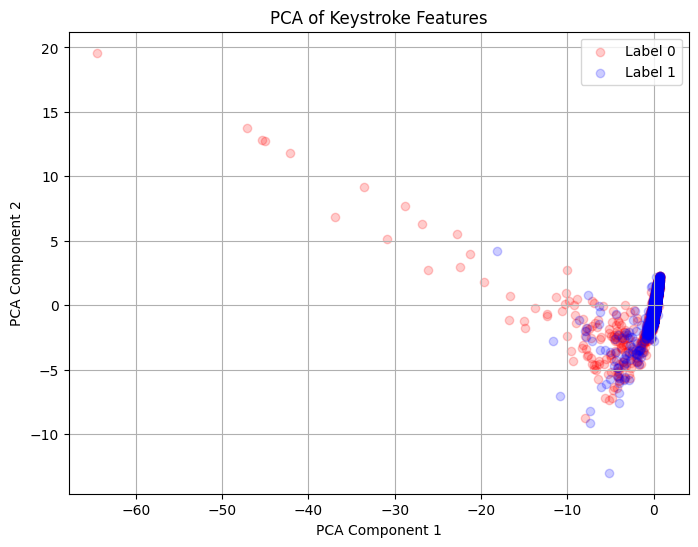

In [86]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Select features to include in PCA
# -------------------------------
features = ["pause_within_mean_ms", "pause_within_max_ms", "pause_within_min_ms", "pause_within_var_ms", "pause_between_ms",
             "cv_dwell", "cv_flight", "entropy_dwell", "entropy_flight"]

X = merged[features].fillna(0)
y = merged["label"].astype(int)

# -------------------------------
# Standardize features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Fit PCA
# -------------------------------
pca = PCA(n_components=2)  # 2D visualization
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# -------------------------------
# Plot 2D PCA
# -------------------------------
plt.figure(figsize=(8, 6))
for lbl, color in zip([0, 1], ["red", "blue"]):
    mask = y == lbl
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                alpha=0.2, label=f"Label {lbl}", c=color)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Keystroke Features")
plt.legend()
plt.grid(True)
plt.show()

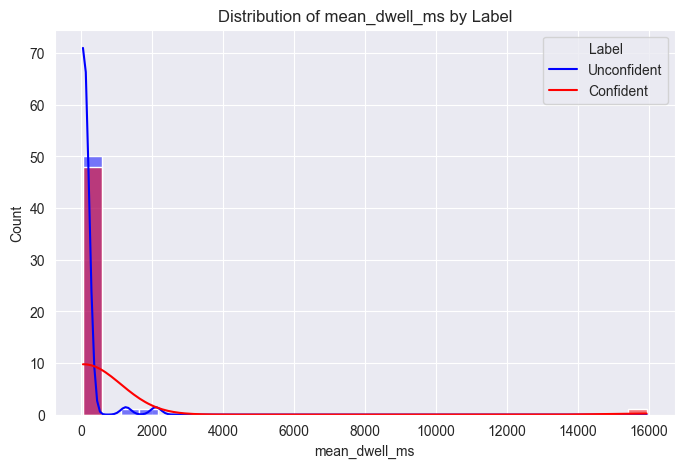

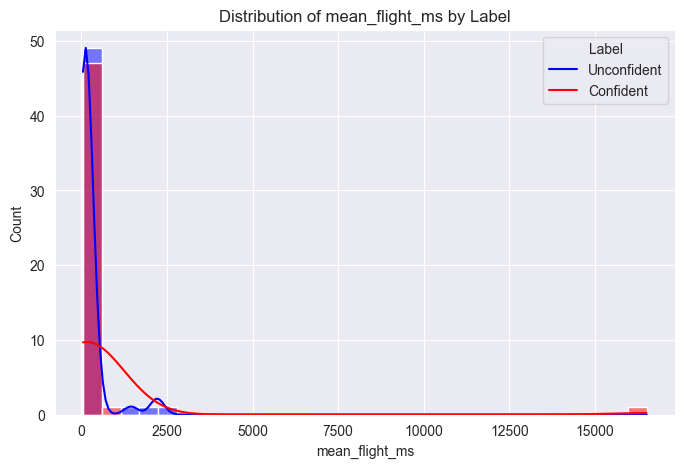

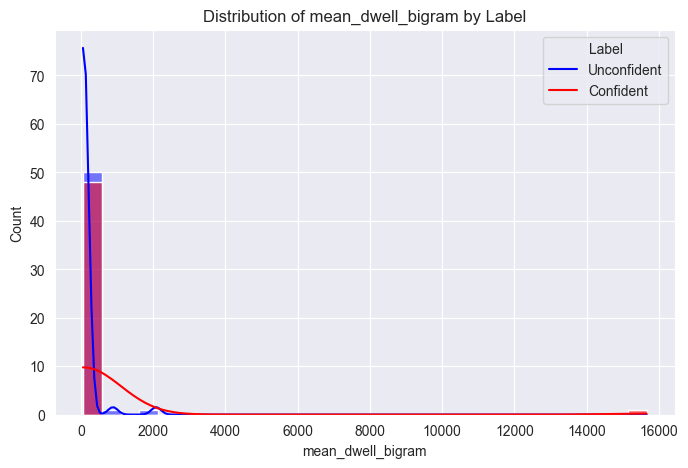

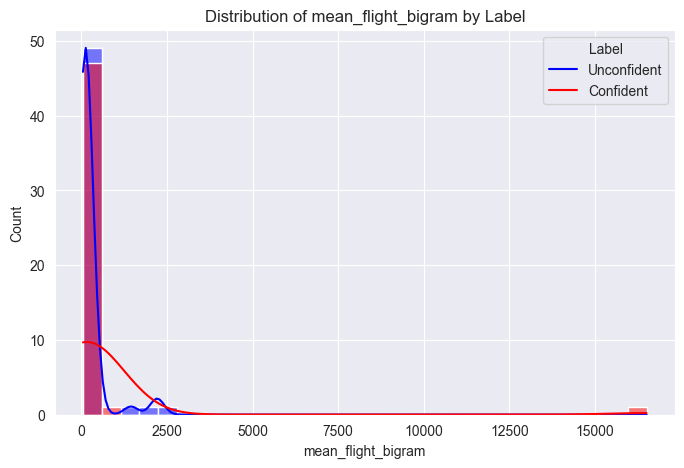

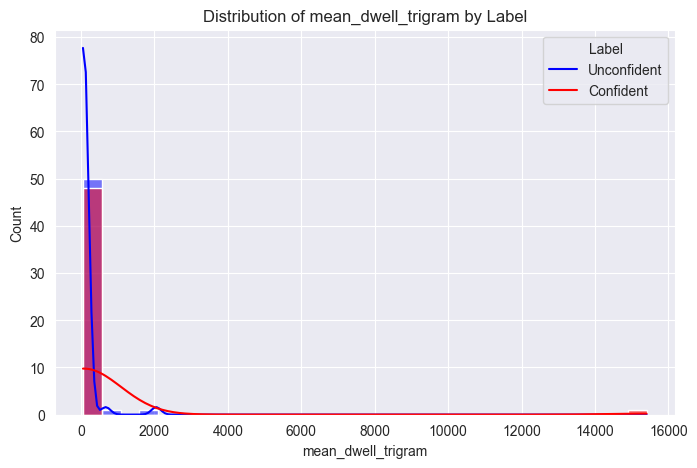

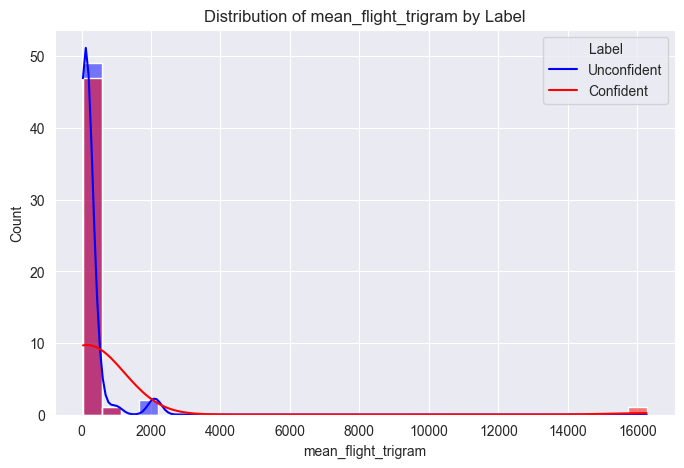

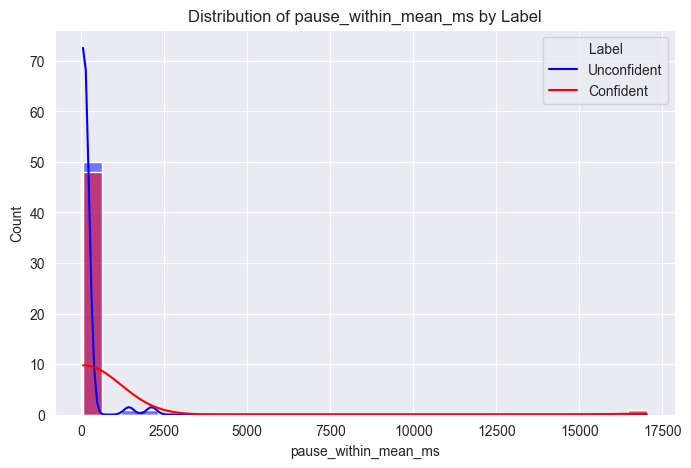

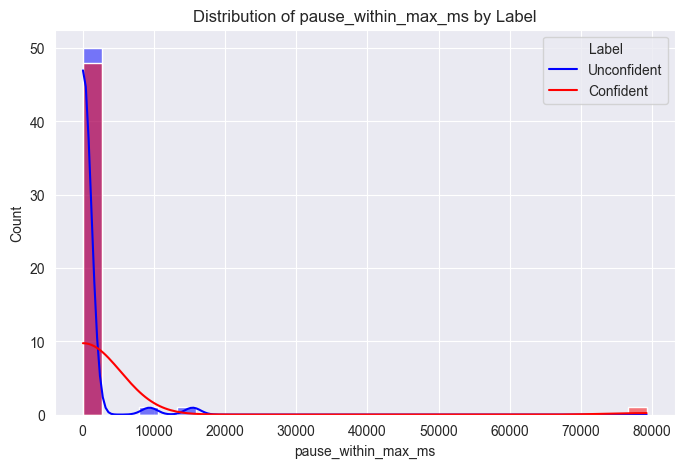

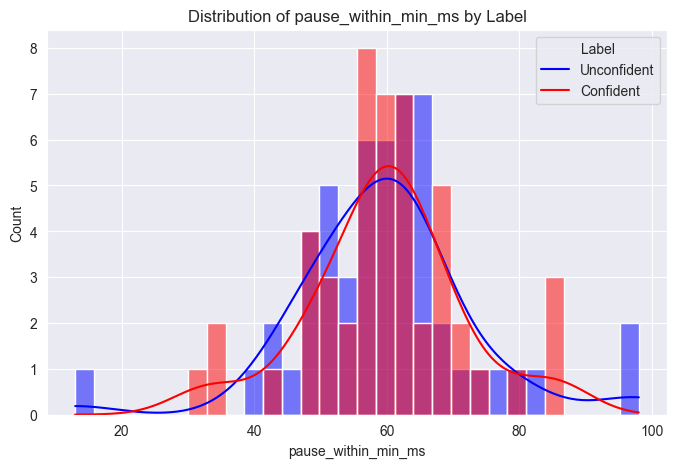

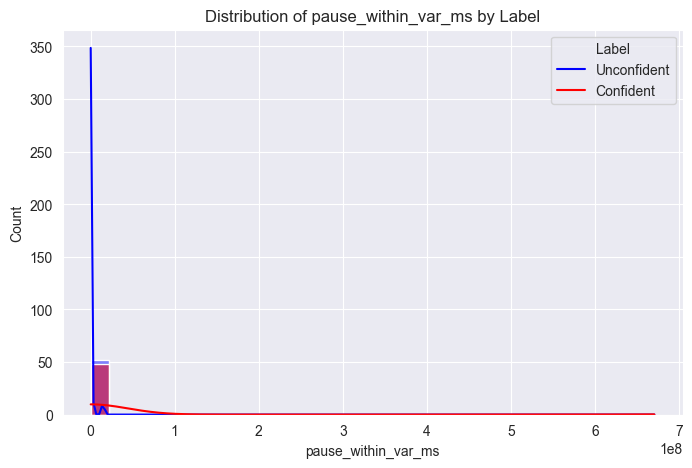

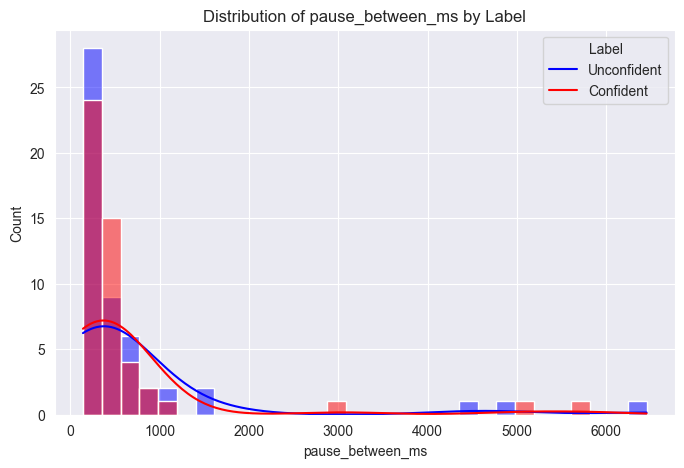

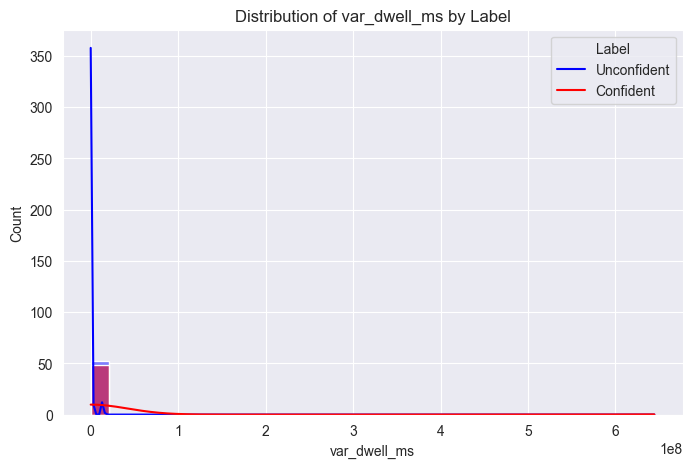

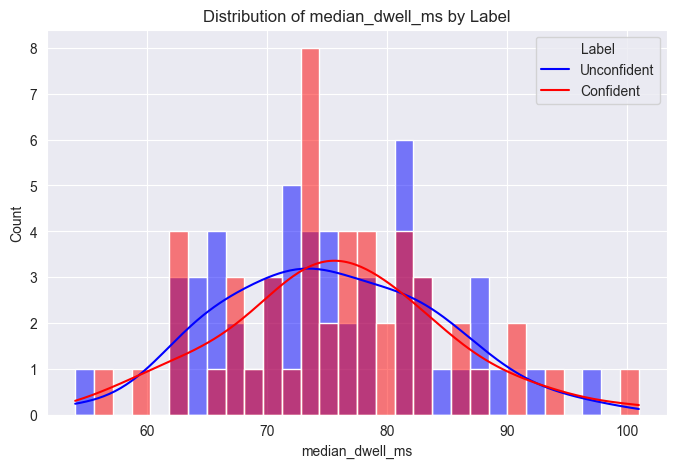

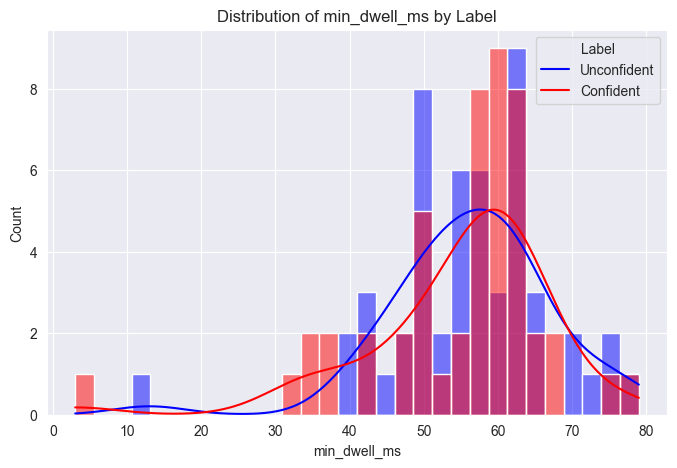

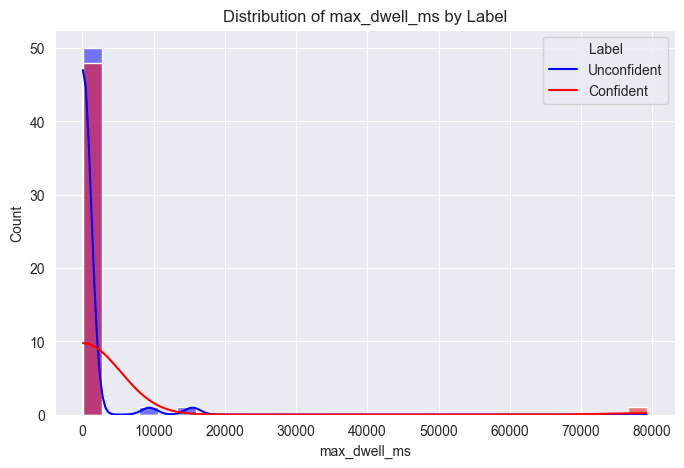

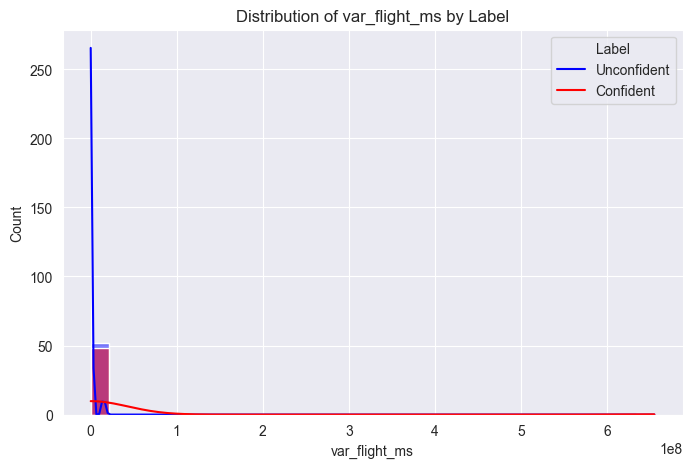

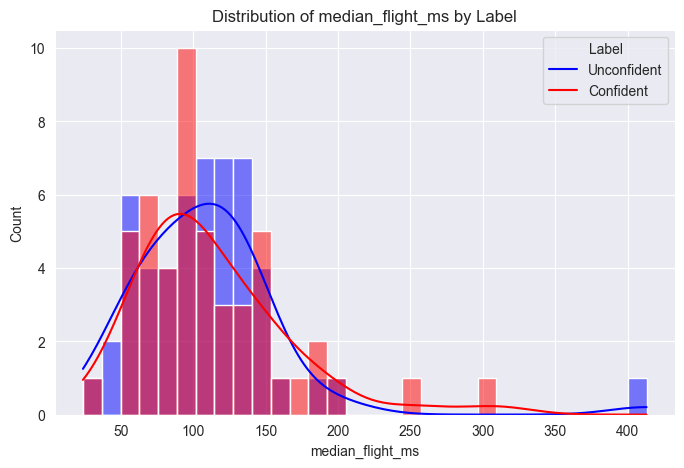

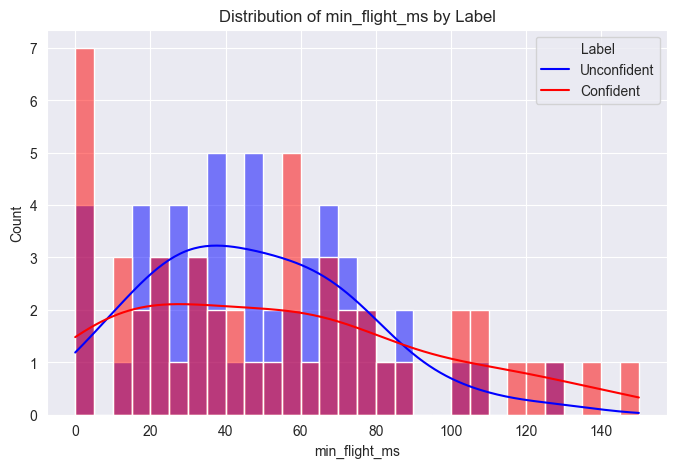

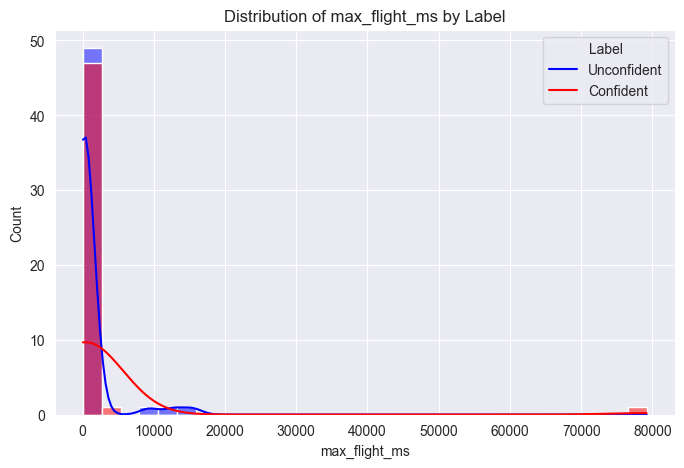

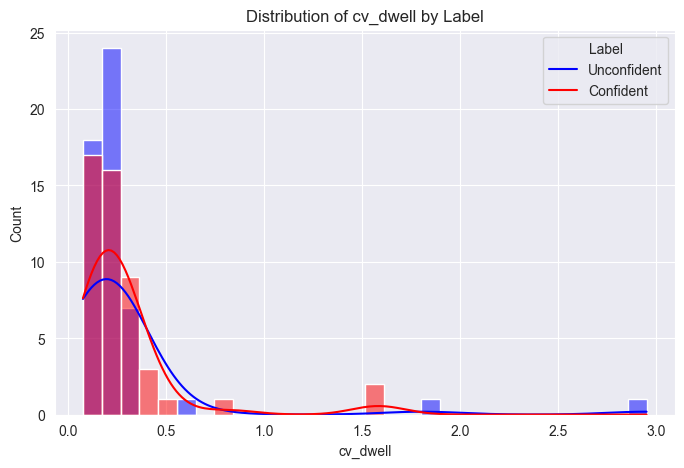

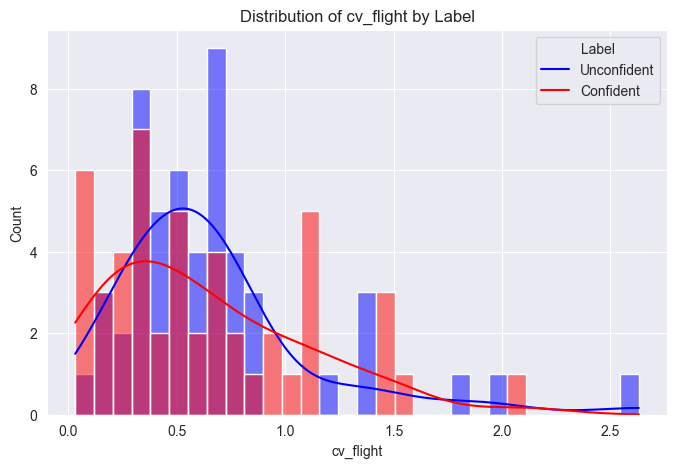

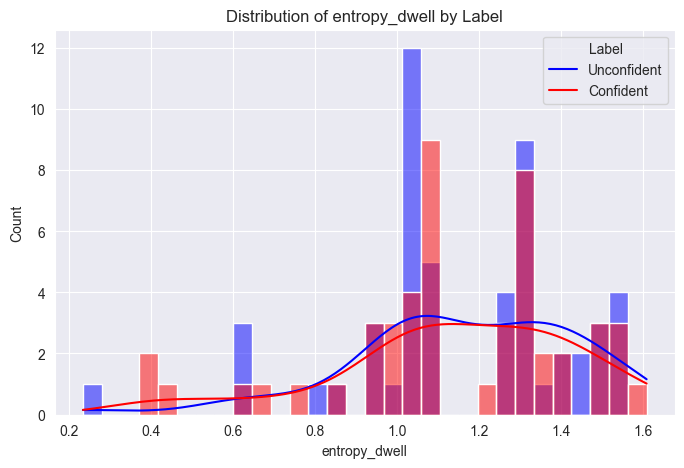

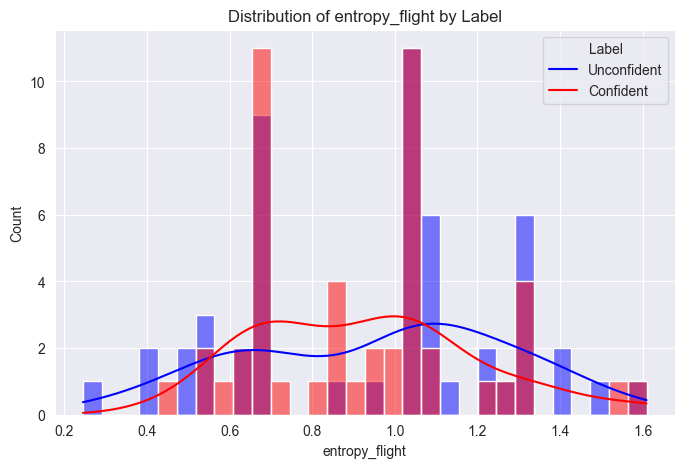

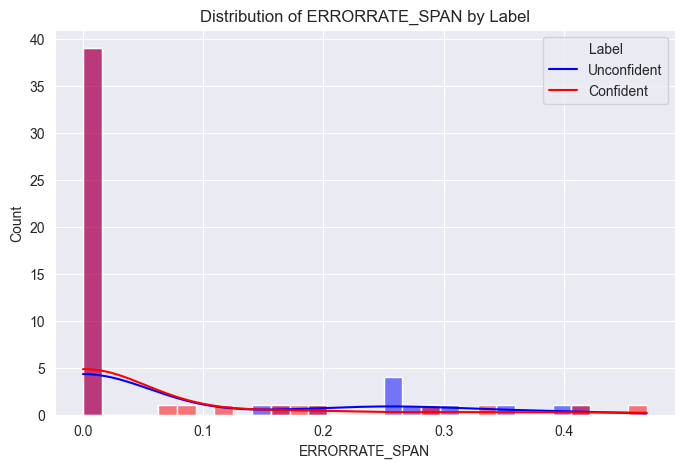

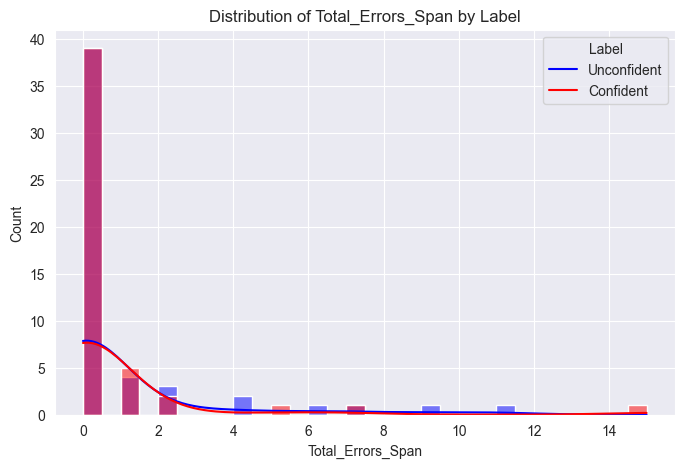

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Features to visualize
# -------------------------------
features = ["mean_dwell_ms", "mean_flight_ms",
        "mean_dwell_bigram", "mean_flight_bigram",
        "mean_dwell_trigram", "mean_flight_trigram", "pause_within_mean_ms", "pause_within_max_ms", "pause_within_min_ms", "pause_within_var_ms", "pause_between_ms",
            "var_dwell_ms", "median_dwell_ms", "min_dwell_ms", "max_dwell_ms", "var_flight_ms", "median_flight_ms", "min_flight_ms", "max_flight_ms",
            "cv_dwell", "cv_flight", "entropy_dwell", "entropy_flight", "ERRORRATE_SPAN", "Total_Errors_Span"]

# z = merged[features].apply(zscore)
# # Keep only spans where all z-scores are <= 3
# clean_df = merged[(z.abs() <= 1).all(axis=1)].reset_index(drop=True)

# -------------------------------
# Loop through features
# -------------------------------
for feat in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=merged[merged["PARTICIPANT_ID"] == "5962a9280b835400010a7617"], x=feat, hue="label",
                 bins=30, kde=True, palette={0:"red", 1:"blue"}, alpha=0.5)
    plt.title(f"Distribution of {feat} by Label")
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.legend(title="Label", labels=["Unconfident", "Confident"])
    plt.grid(True)
    plt.show()
